In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Dataset/ds_salaries.csv')
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [5]:
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

In [6]:
df.describe(include='all')

work_year experience_level employment_type      job_title  \
count   3755.000000             3755            3755           3755   
unique          NaN                4               4             93   
top             NaN               SE              FT  Data Engineer   
freq            NaN             2516            3718           1040   
mean    2022.373635              NaN             NaN            NaN   
std        0.691448              NaN             NaN            NaN   
min     2020.000000              NaN             NaN            NaN   
25%     2022.000000              NaN             NaN            NaN   
50%     2022.000000              NaN             NaN            NaN   
75%     2023.000000              NaN             NaN            NaN   
max     2023.000000              NaN             NaN            NaN   

              salary salary_currency  salary_in_usd employee_residence  \
count   3.755000e+03            3755    3755.000000               3755   
unique           NaN              20            NaN                 78   
top              NaN             USD            NaN                 US   
freq             NaN            3224            NaN               3004   
mean    1.906956e+05             NaN  137570.389880                NaN   
std     6.716765e+05             NaN   63055.625278                NaN   
min     6.000000e+03             NaN    5132.000000                NaN   
25%     1.000000e+05             NaN   95000.000000                NaN   
50%     1.380000e+05             NaN  135000.000000                NaN   
75%     1.800000e+05             NaN  175000.000000                NaN   
max     3.040000e+07             NaN  450000.000000                NaN   

        remote_ratio company_location company_size  
count    3755.000000             3755         3755  
unique           NaN               72            3  
top              NaN               US            M  
freq             NaN             3040         3153  
mean       46.271638              NaN          NaN  
std        48.589050              NaN          NaN  
min         0.000000              NaN          NaN  
25%         0.000000              NaN          NaN  
50%         0.000000              NaN          NaN  
75%       100.000000              NaN          NaN  
max       100.000000              NaN          NaN

In [7]:
df_sorted = df.sort_values(by='salary_in_usd',ascending=False)
df_sorted.head()

work_year experience_level employment_type  \
3522       2020               MI              FT   
2011       2022               MI              FT   
528        2023               SE              FT   
3747       2021               MI              FT   
3675       2021               EX              CT   

                               job_title   salary salary_currency  \
3522                  Research Scientist   450000             USD   
2011                        Data Analyst   350000             GBP   
528                         AI Scientist  1500000             ILS   
3747  Applied Machine Learning Scientist   423000             USD   
3675            Principal Data Scientist   416000             USD   

      salary_in_usd employee_residence  remote_ratio company_location  \
3522         450000                 US             0               US   
2011         430967                 GB             0               GB   
528          423834                 IL             0               IL   
3747         423000                 US            50               US   
3675         416000                 US           100               US   

     company_size  
3522            M  
2011            M  
528             L  
3747            L  
3675            S

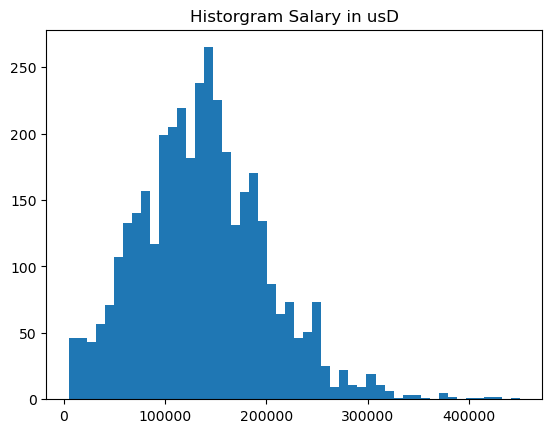

In [8]:
plt.hist(df['salary_in_usd'], bins=50)
plt.title("Historgram Salary in usD")
plt.show()

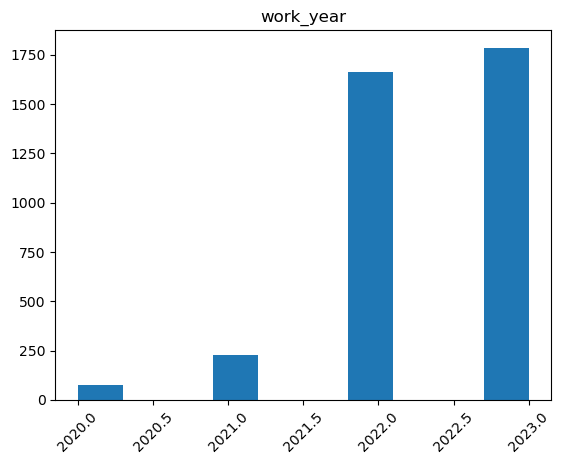

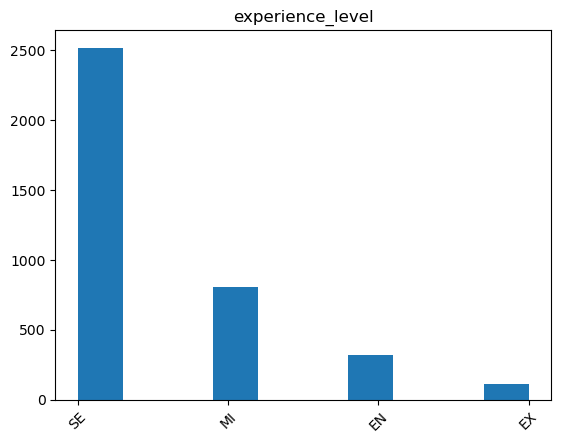

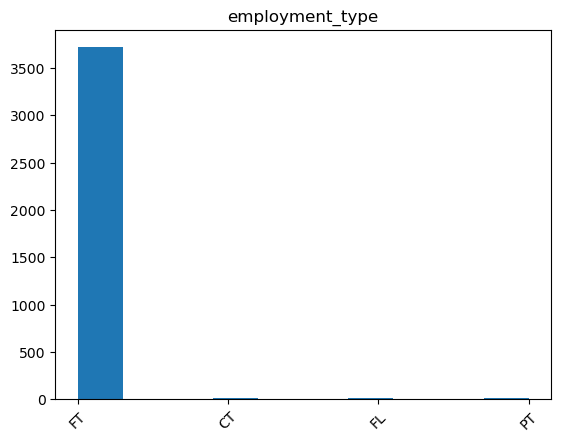

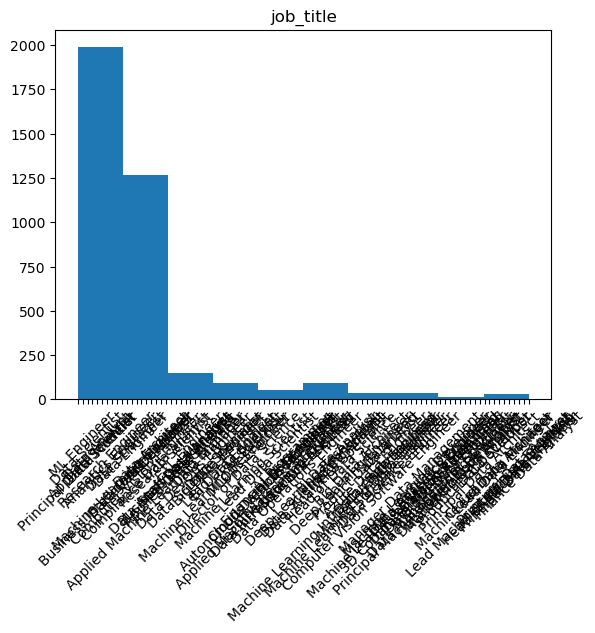

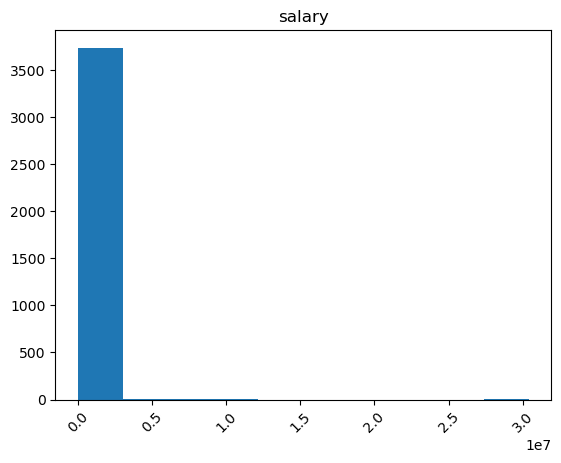

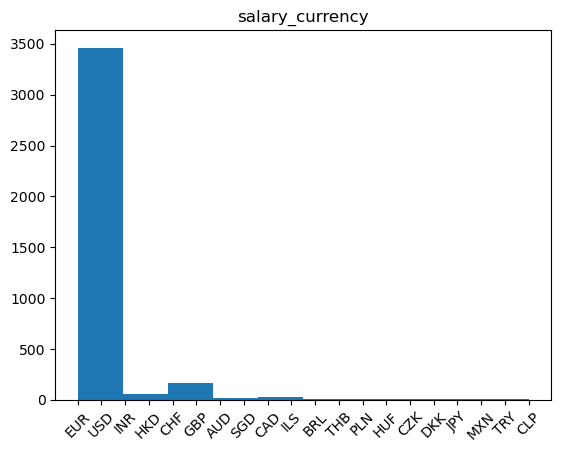

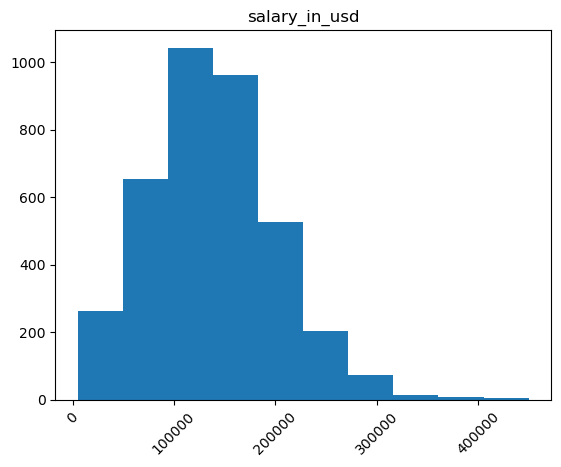

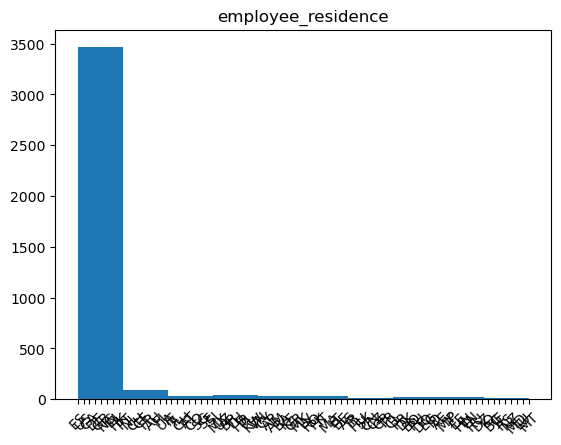

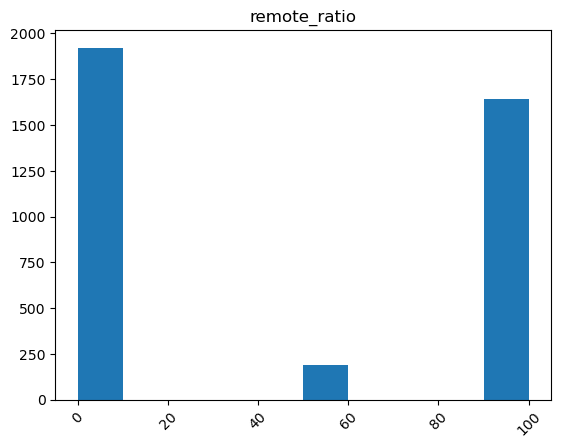

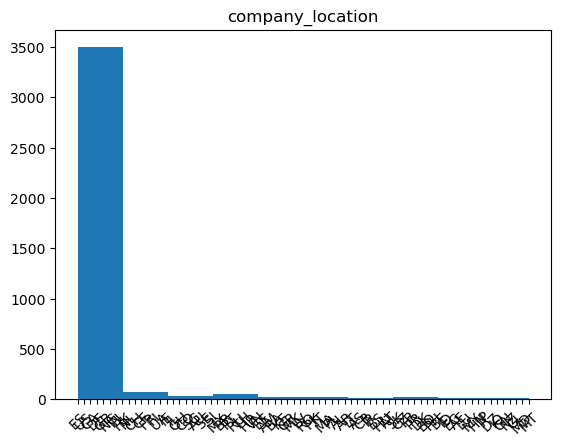

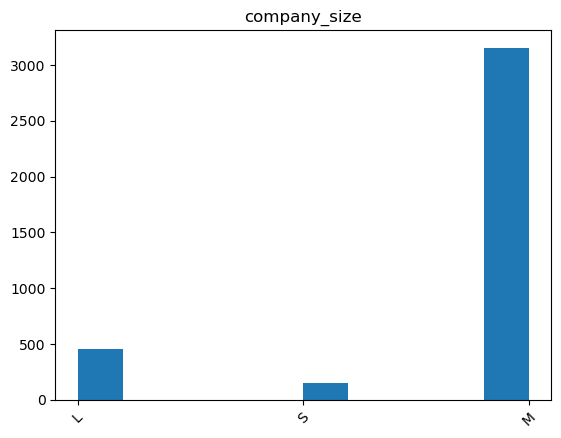

In [9]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

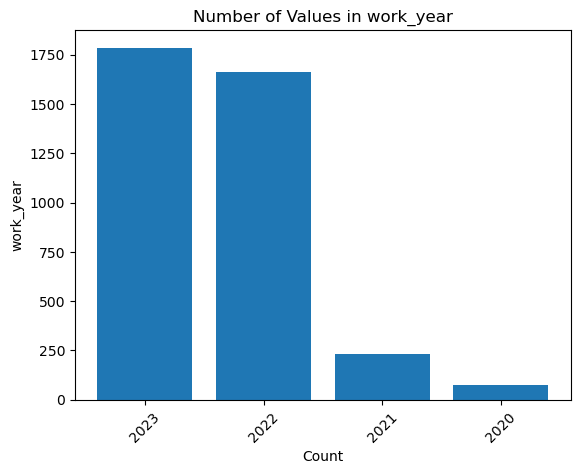

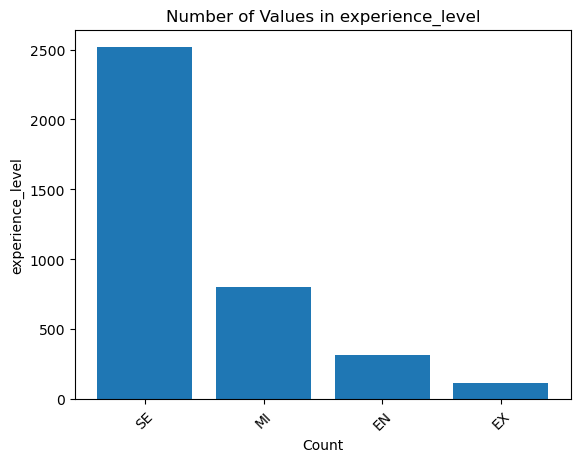

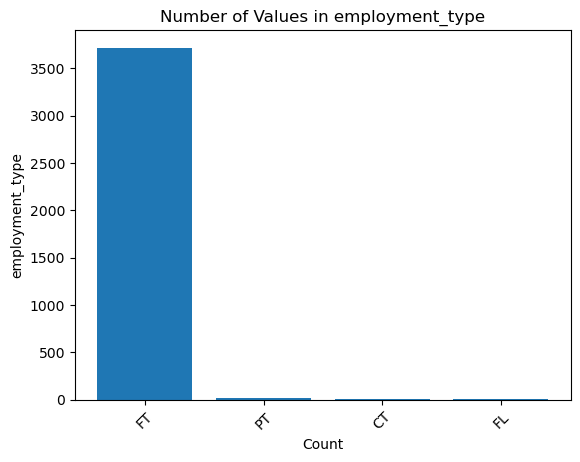

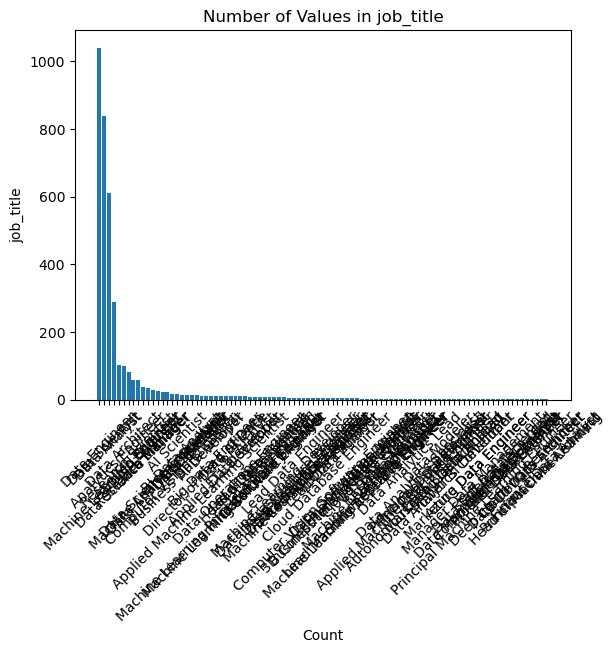

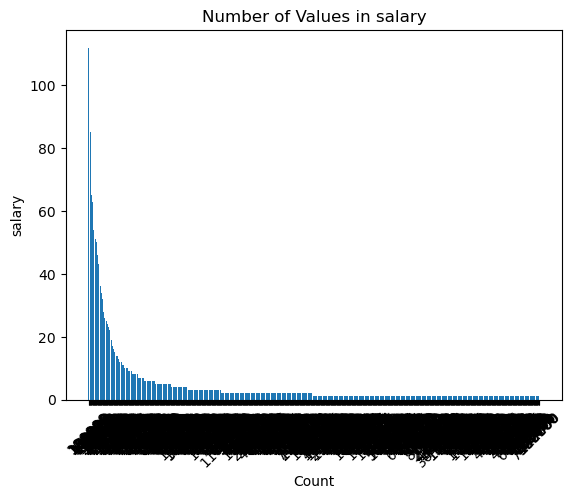

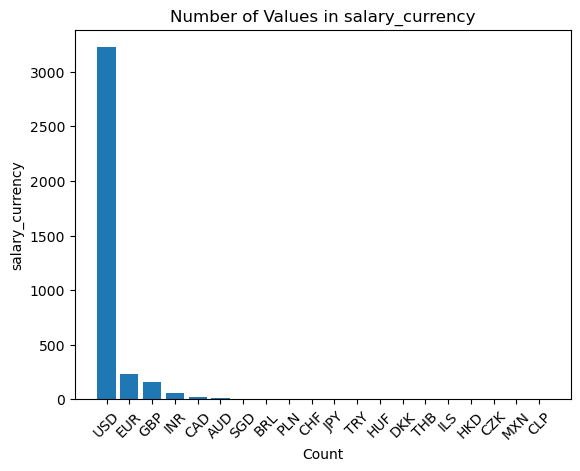

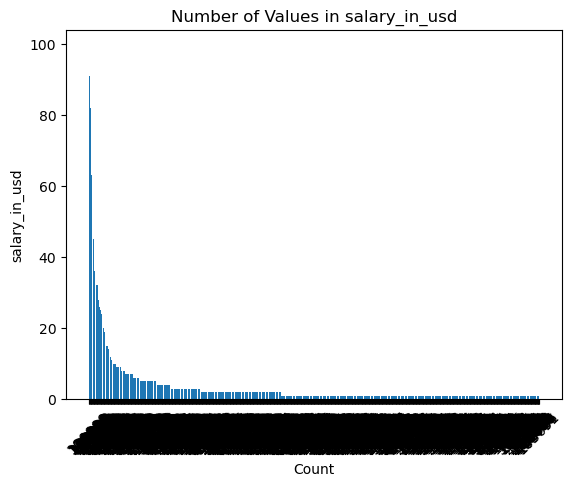

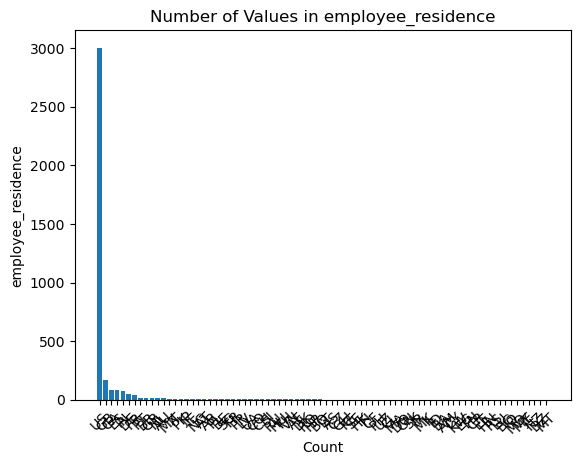

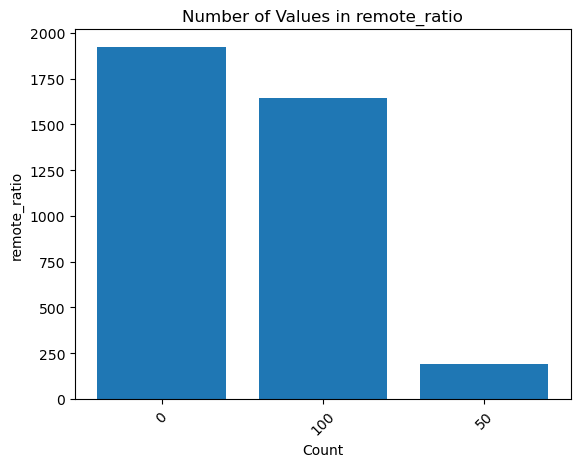

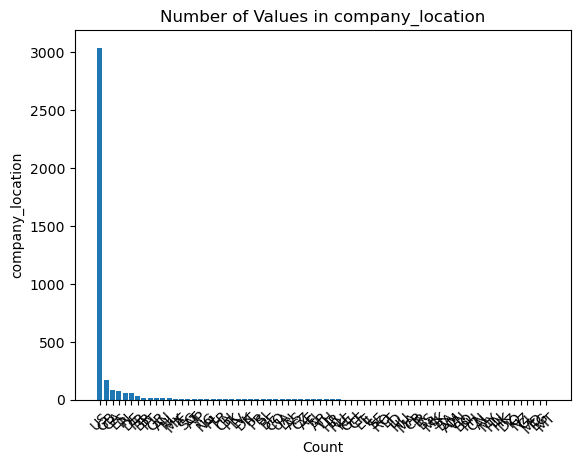

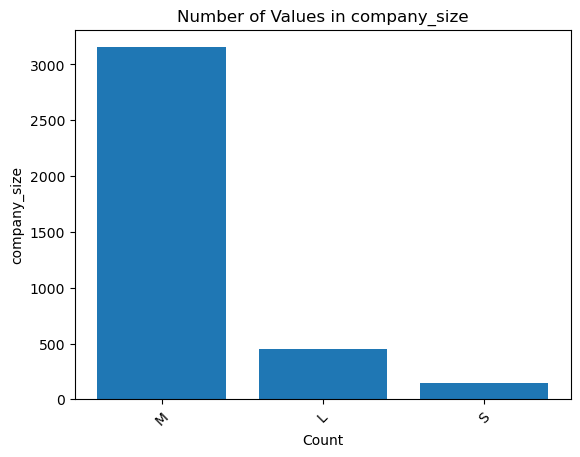

In [10]:
for col in df.columns:
    sorted_counts = df[col].value_counts().sort_values(ascending=False)
    plt.figure()
    plt.bar(sorted_counts.index.astype(str), sorted_counts)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.title(f'Number of Values in {col}')
    plt.xticks(rotation=45)
    plt.show()

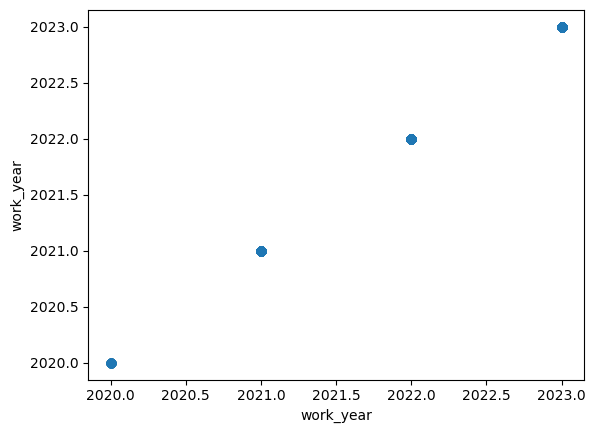

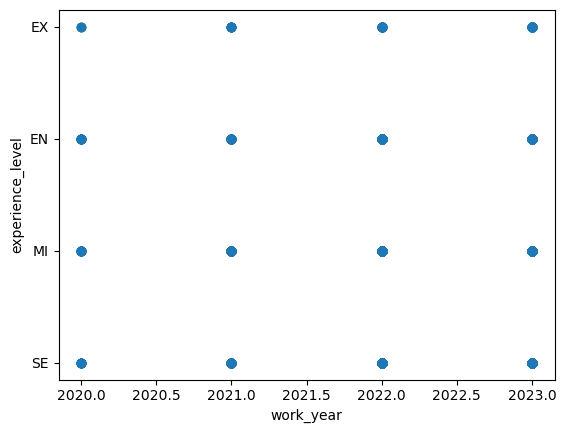

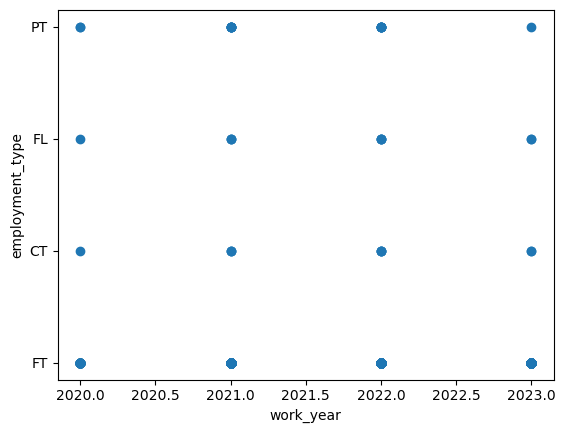

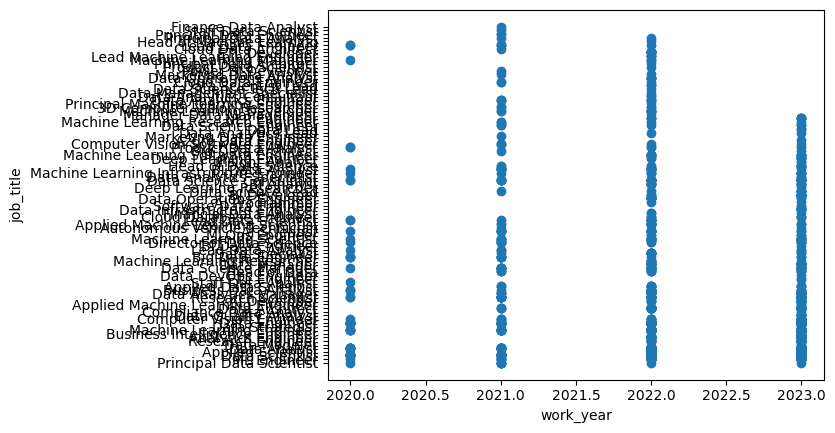

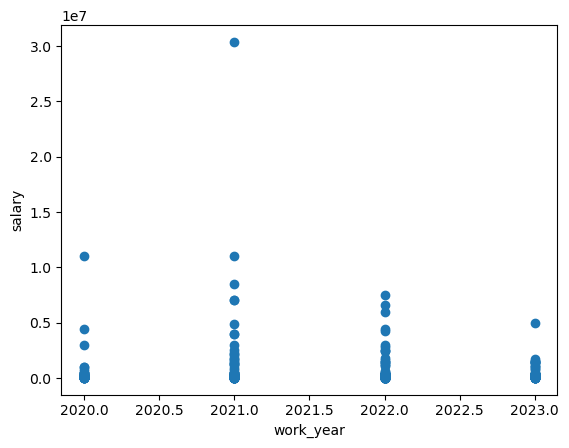

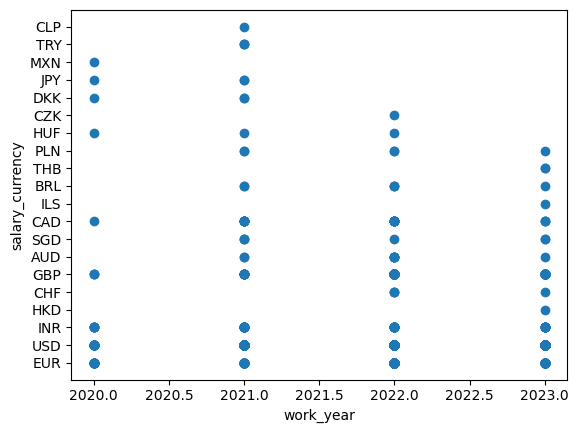

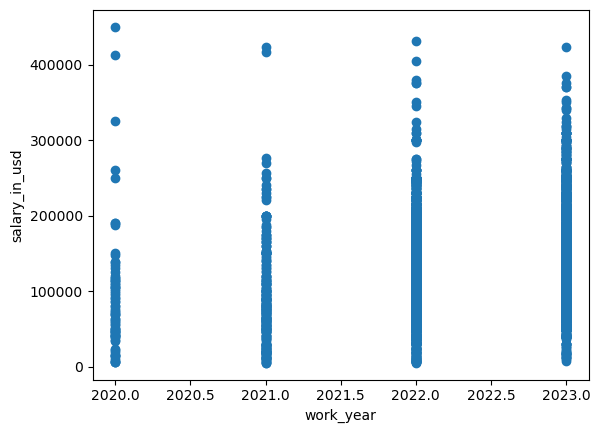

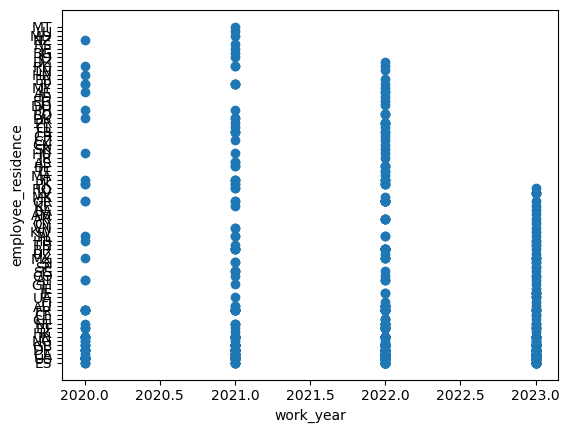

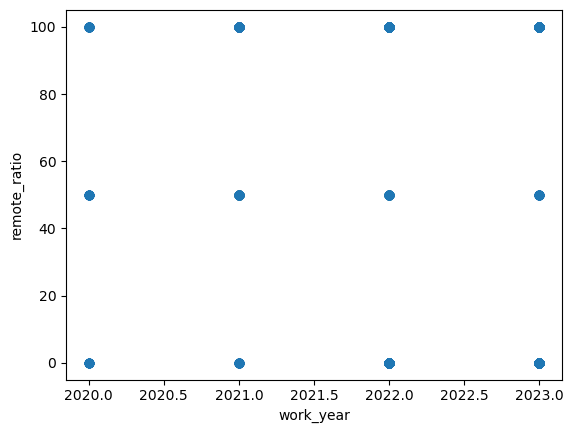

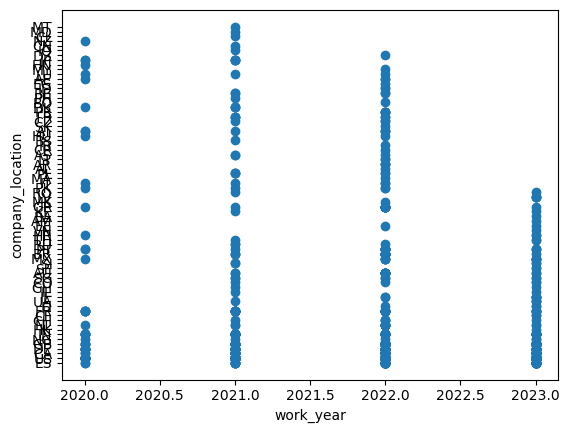

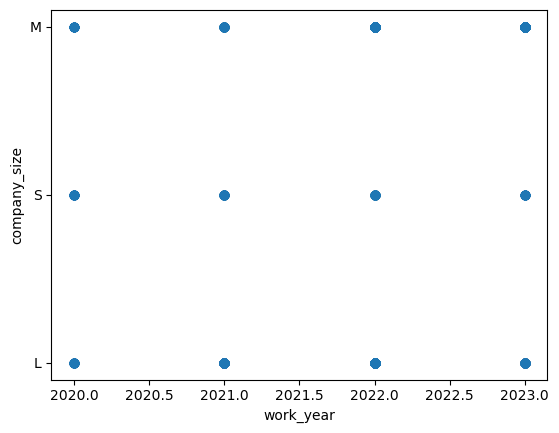

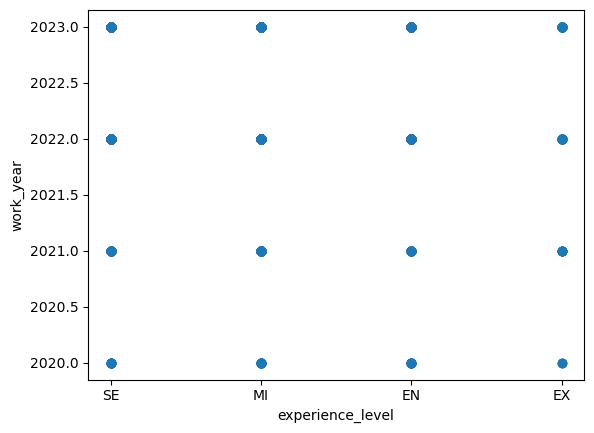

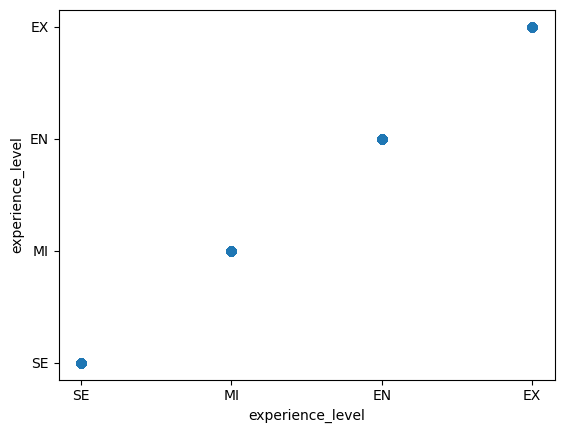

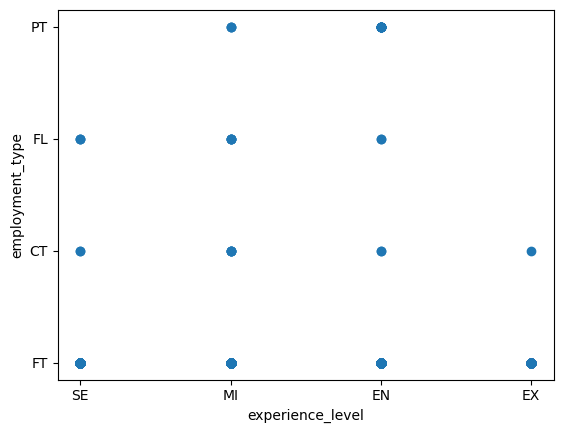

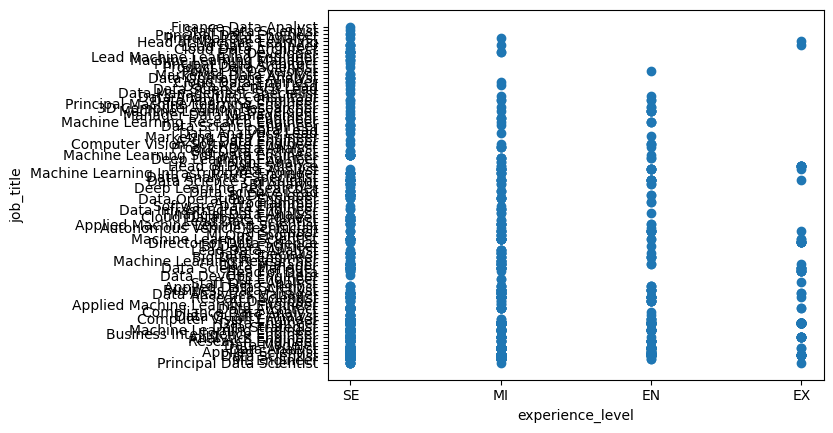

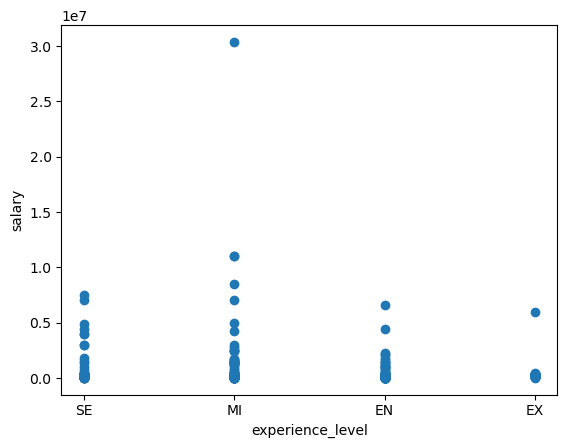

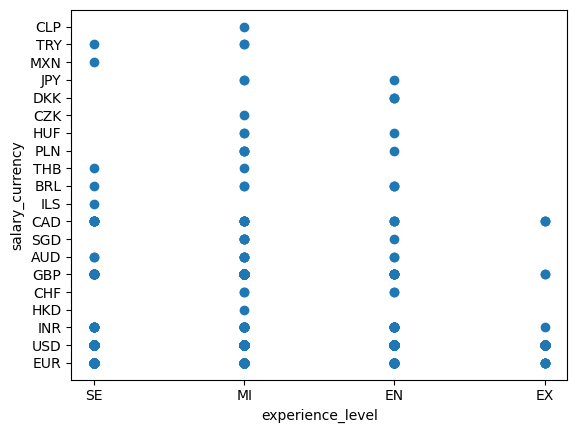

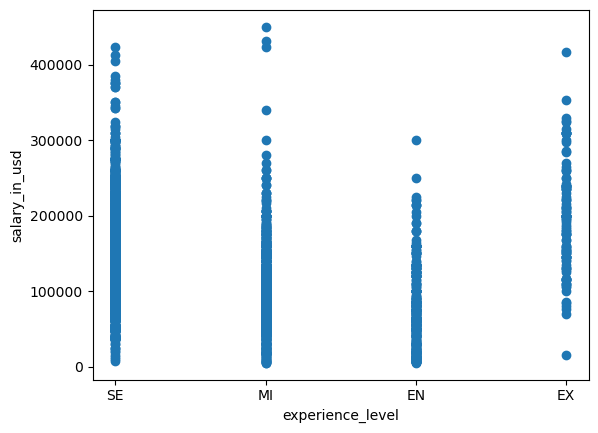

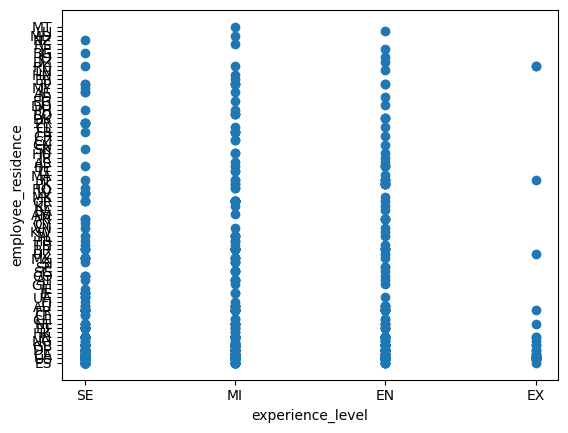

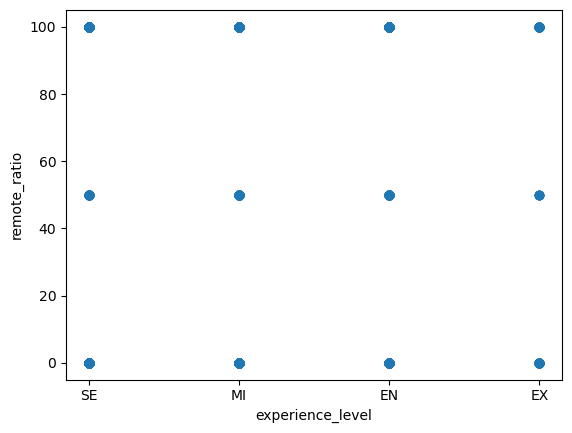

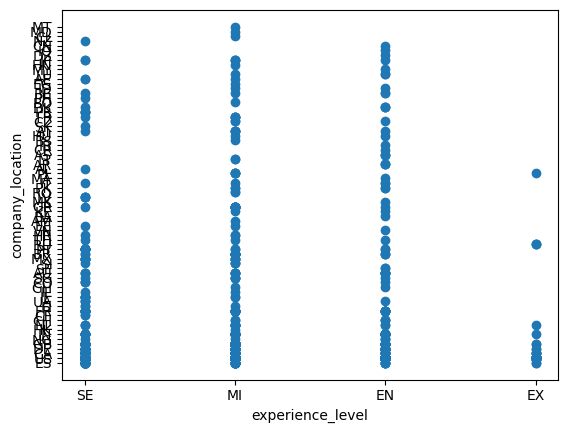

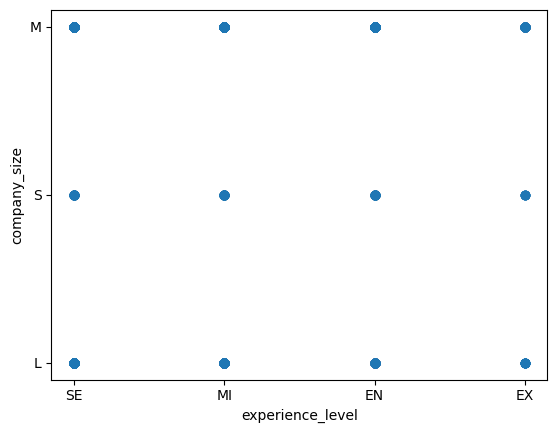

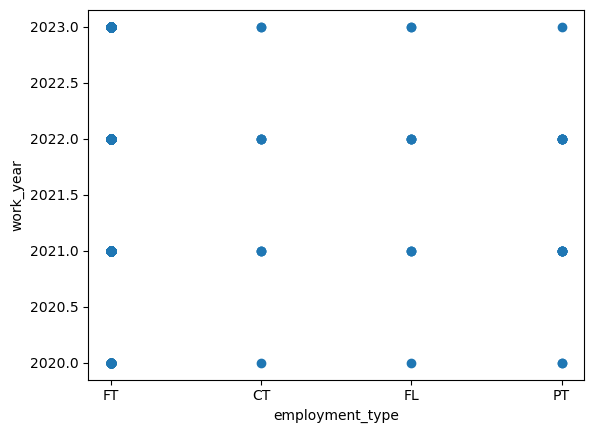

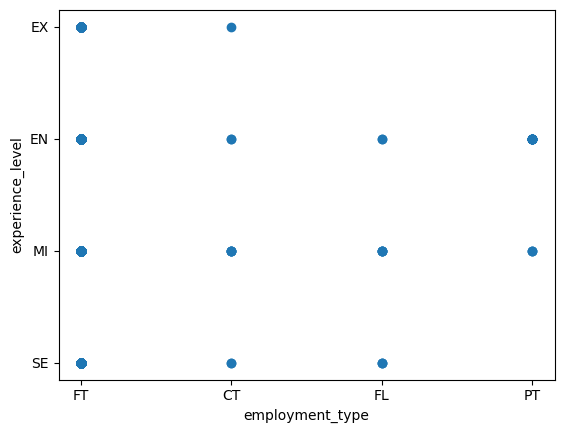

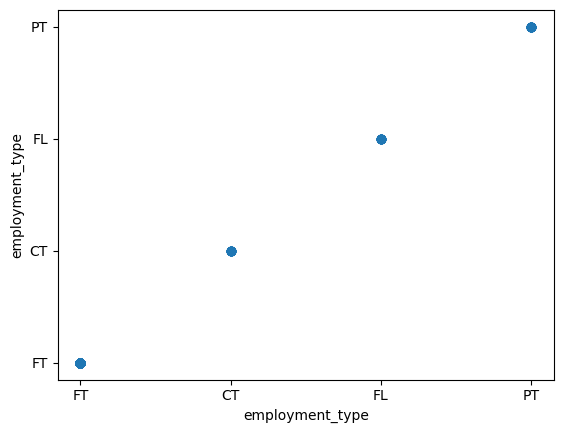

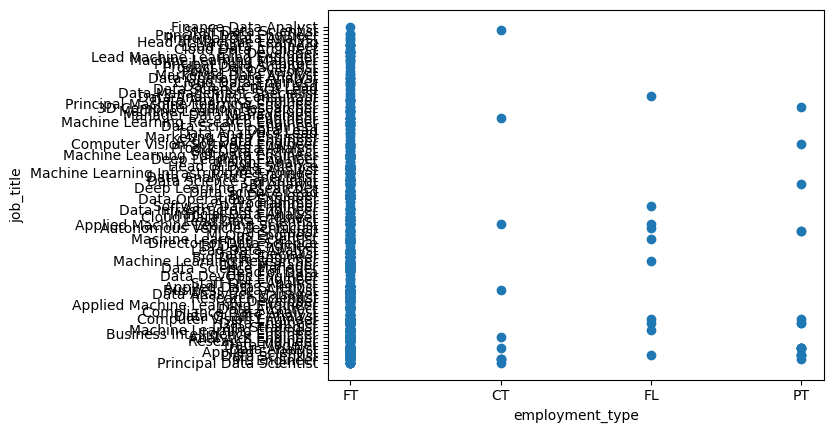

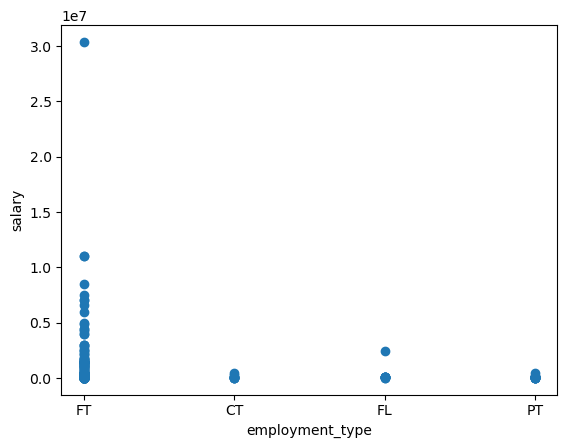

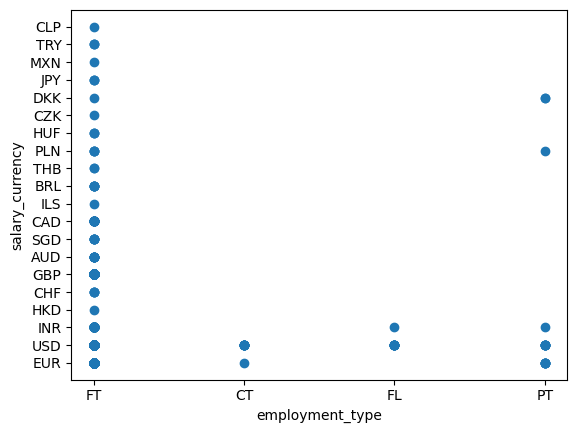

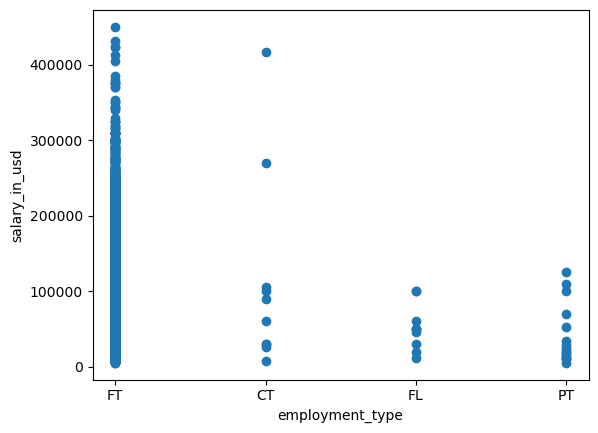

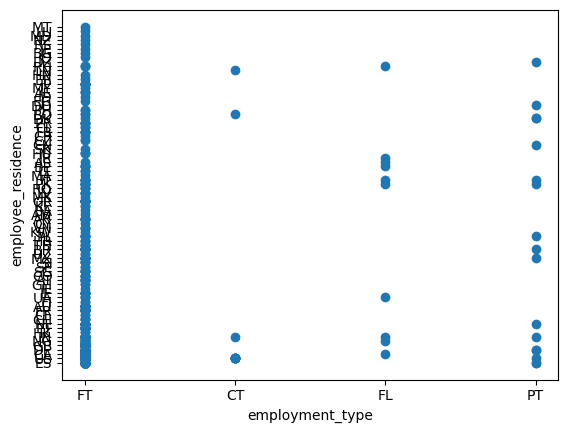

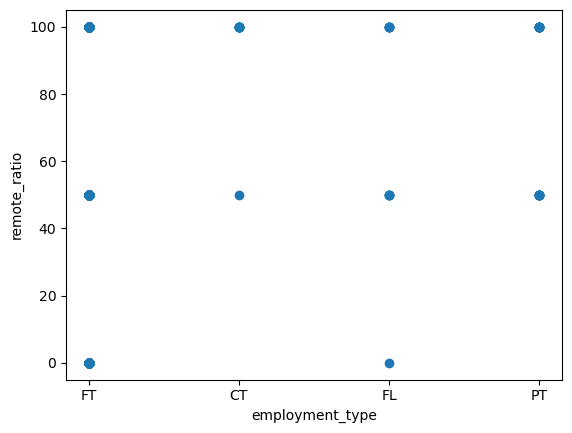

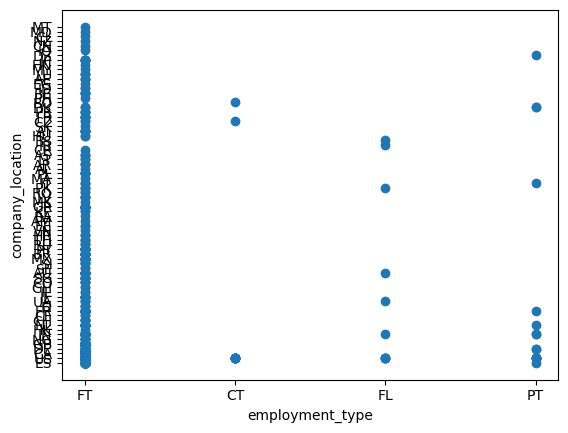

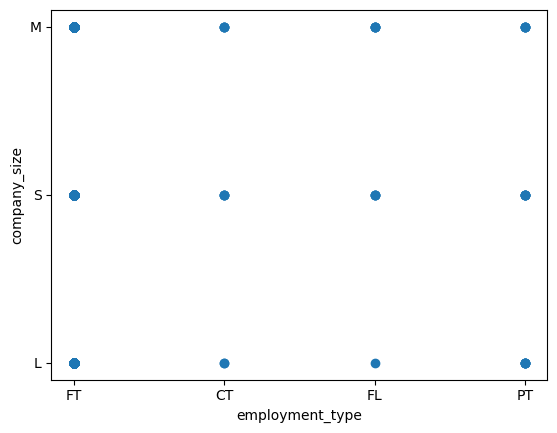

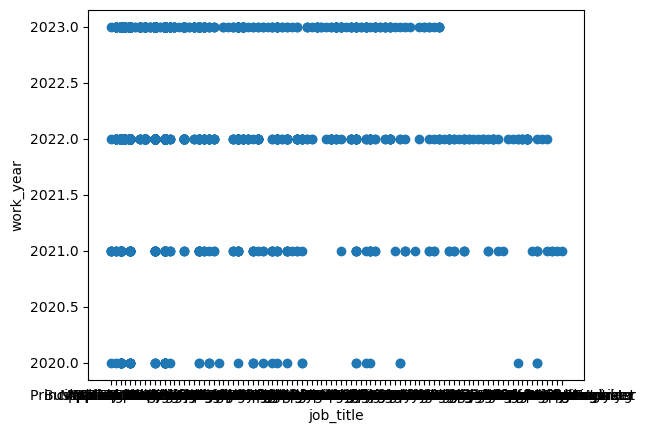

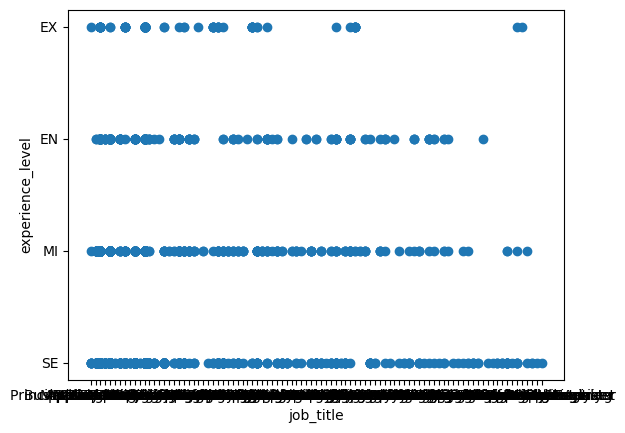

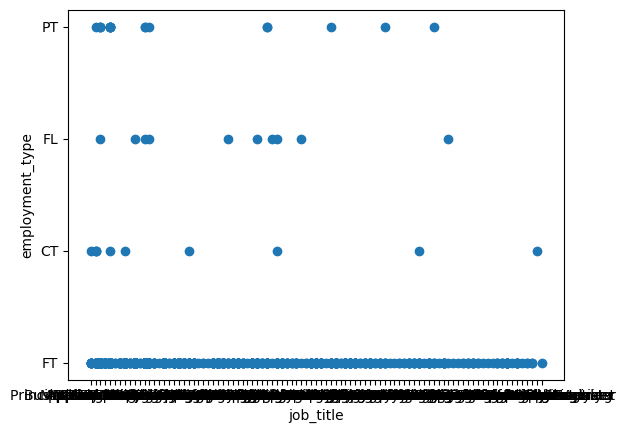

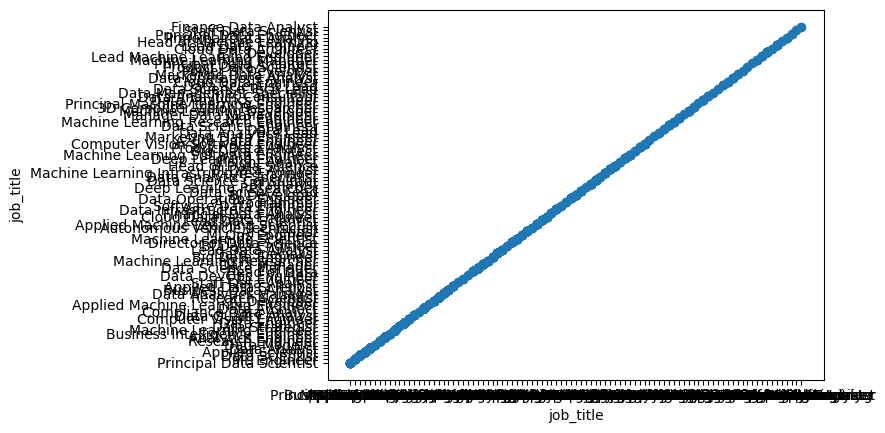

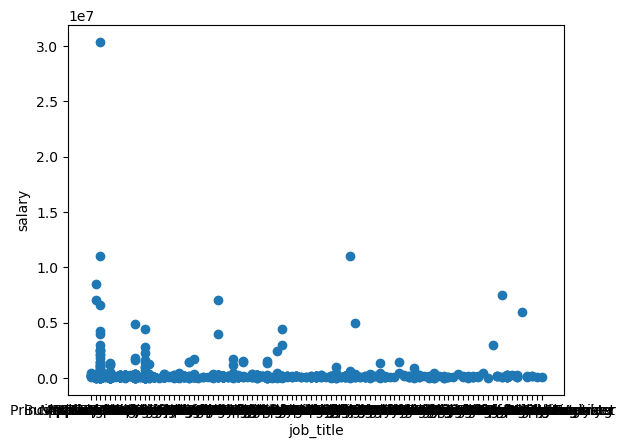

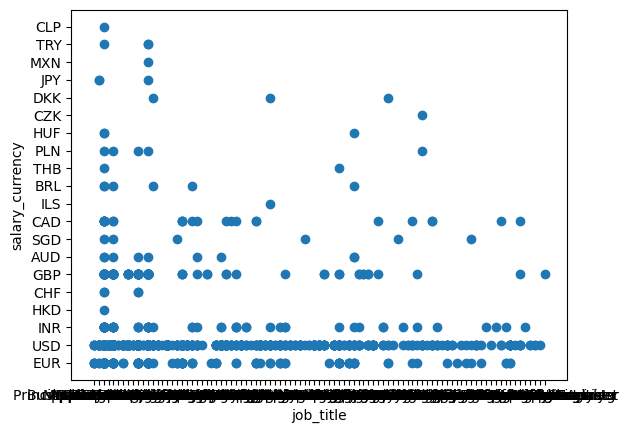

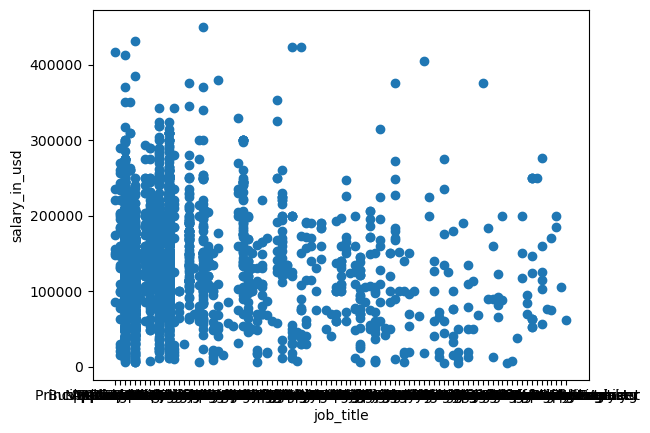

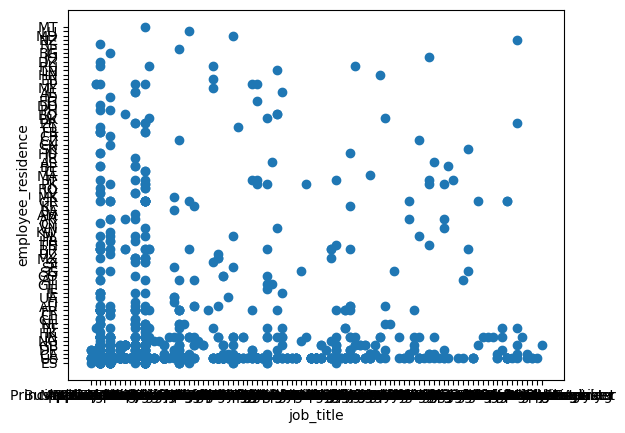

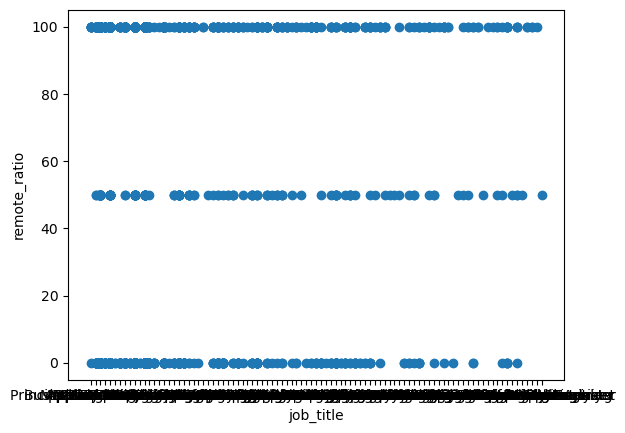

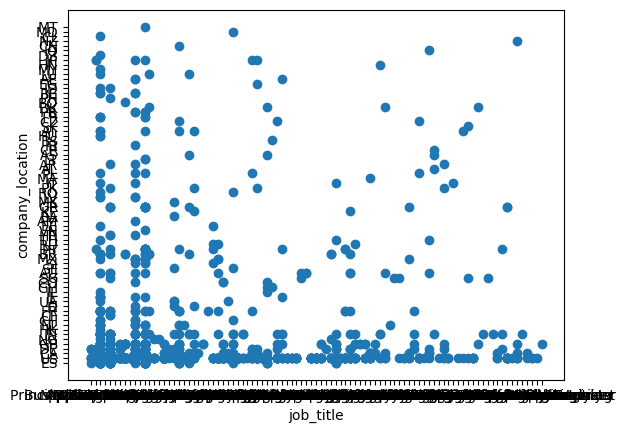

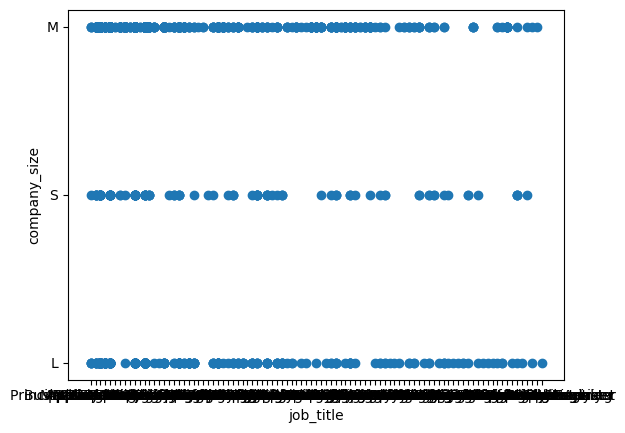

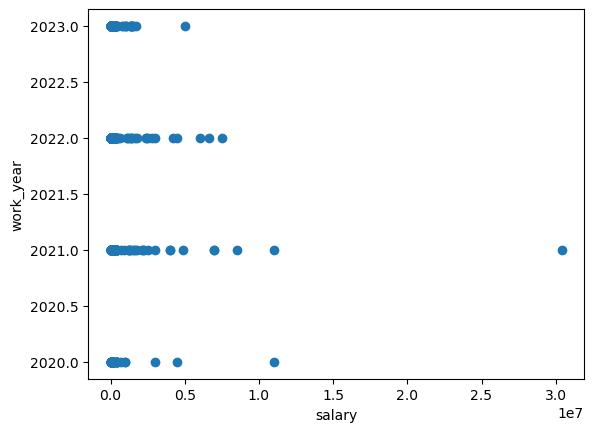

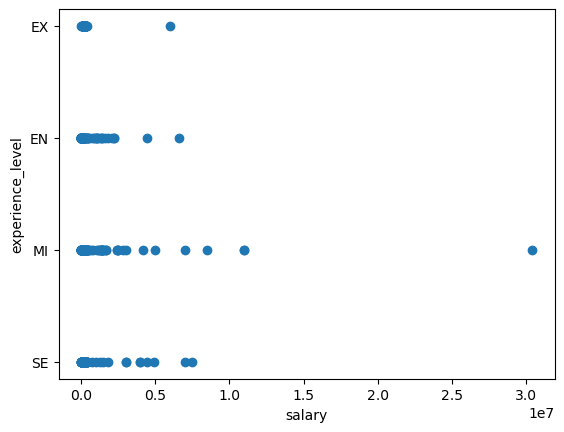

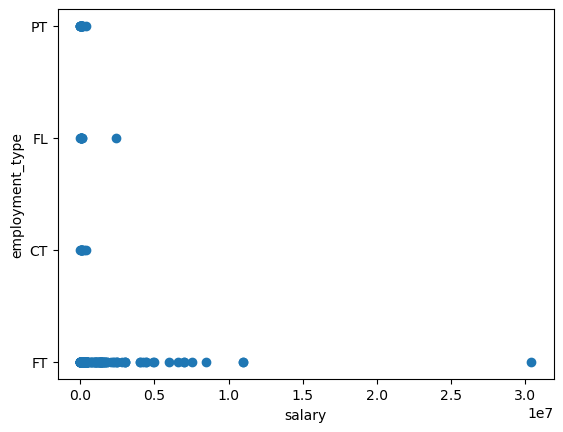

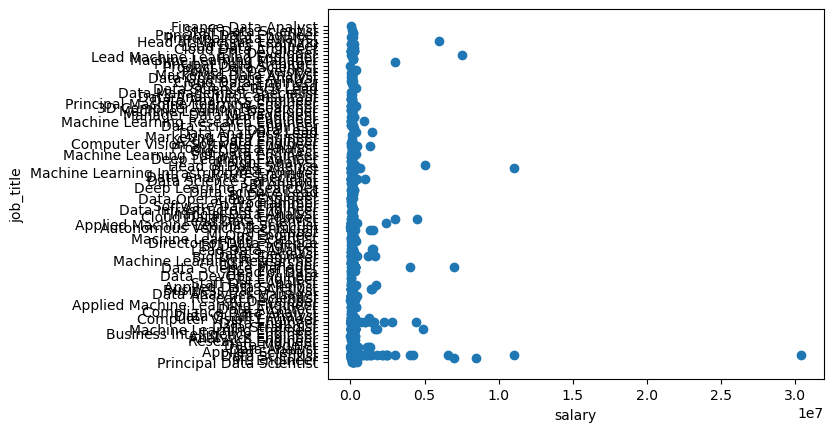

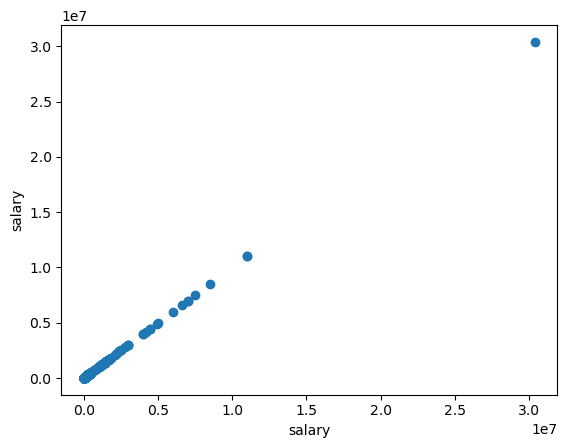

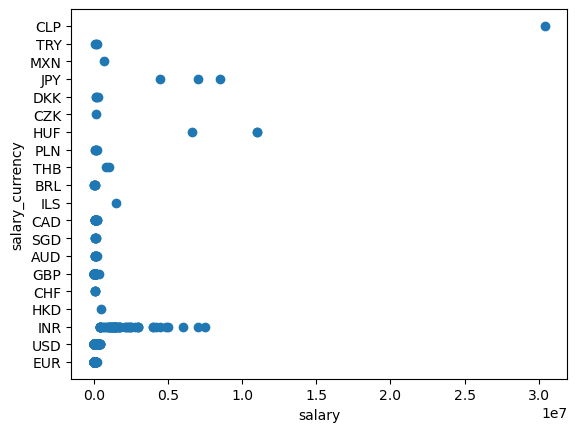

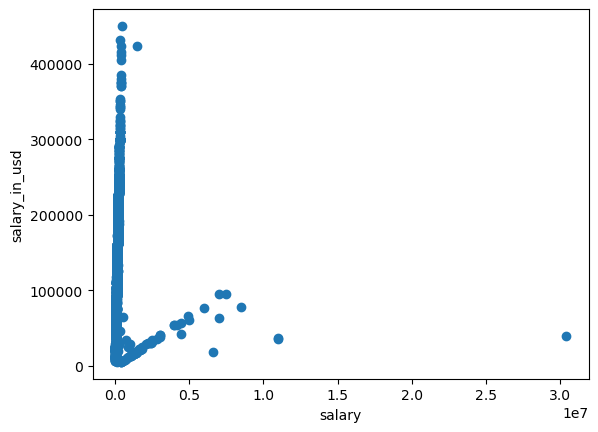

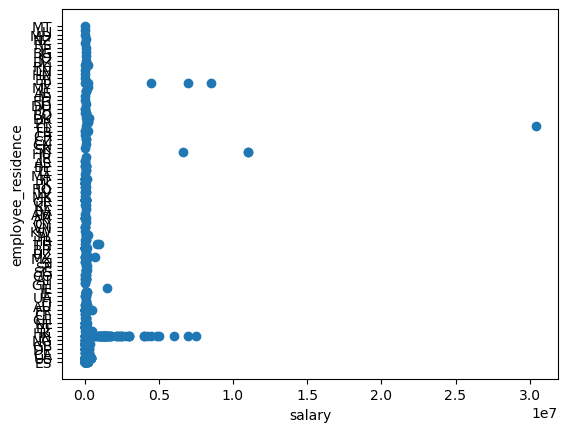

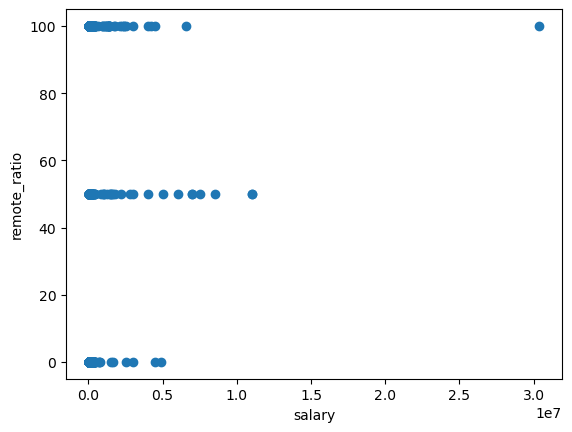

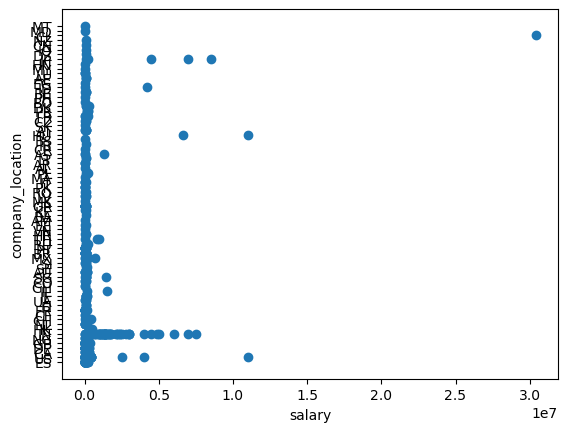

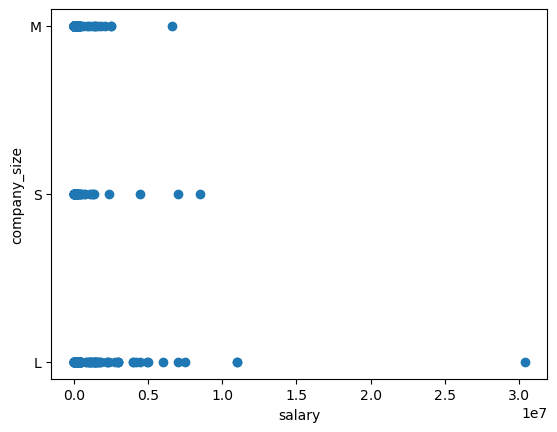

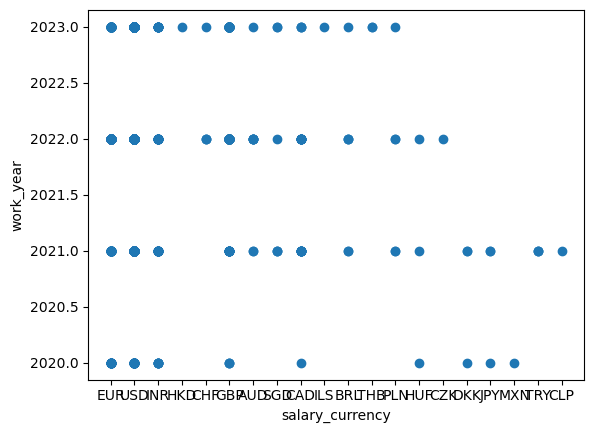

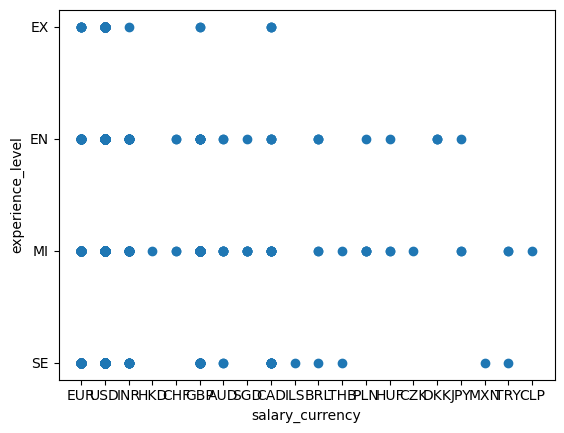

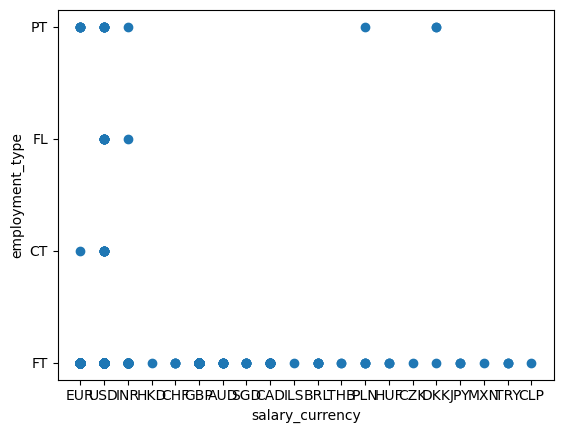

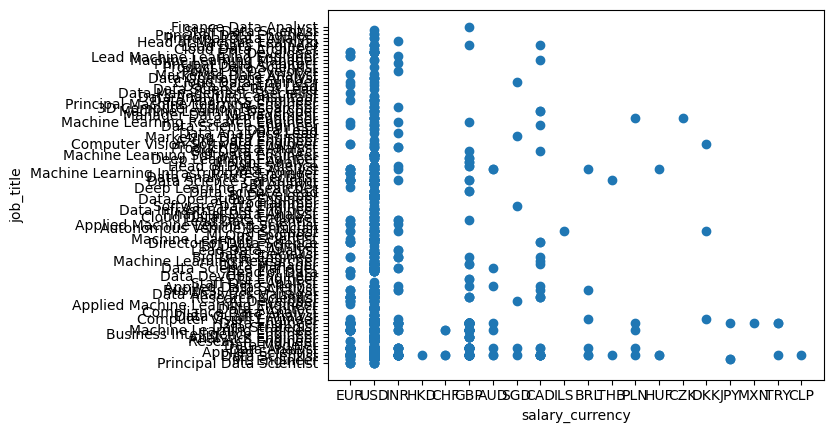

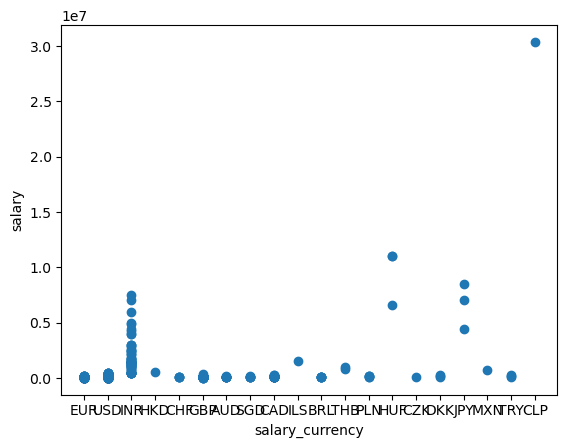

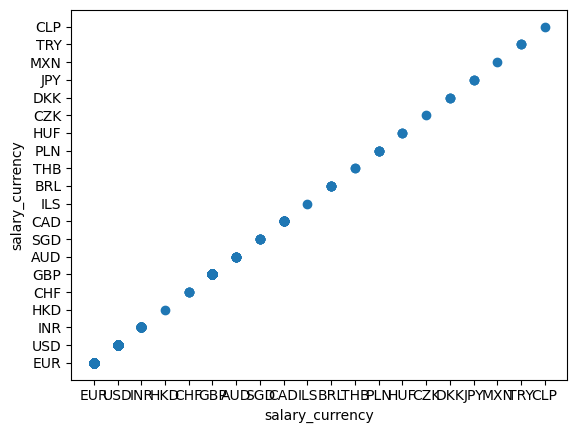

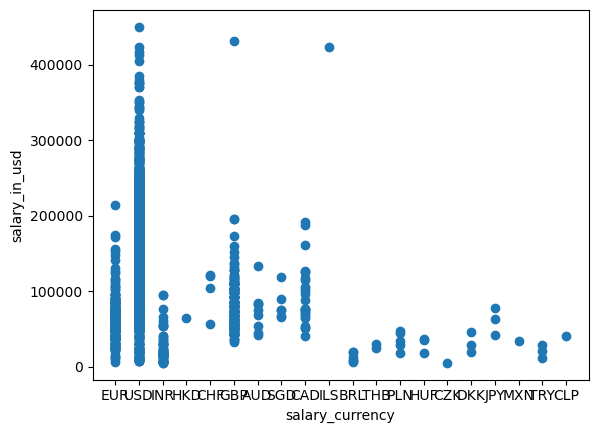

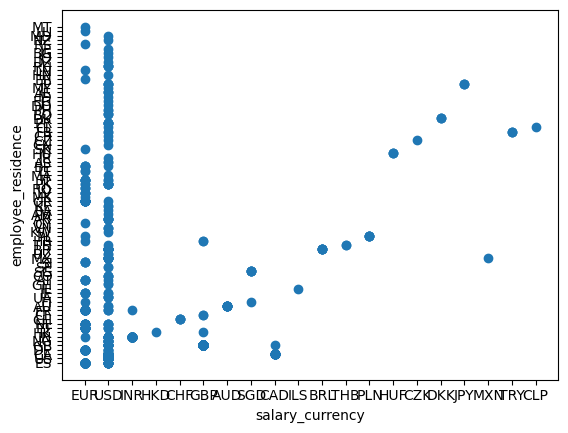

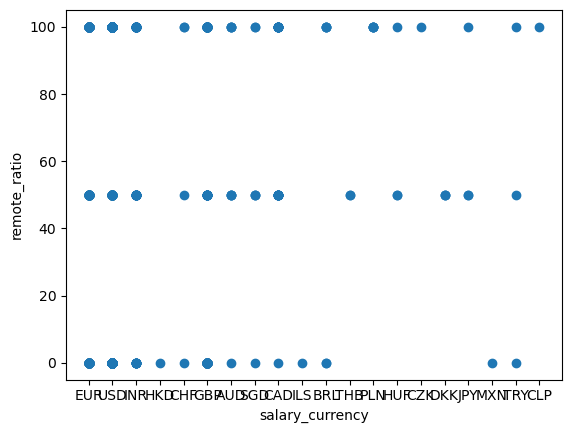

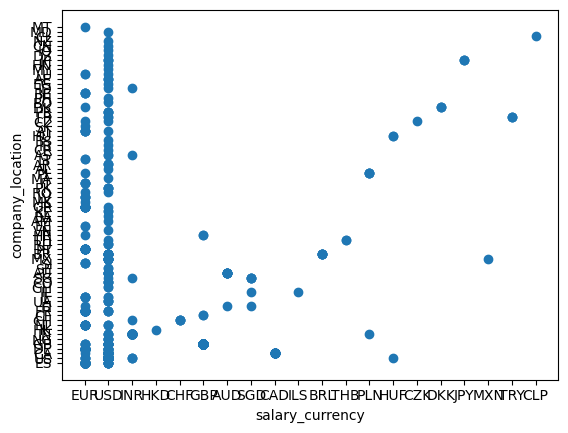

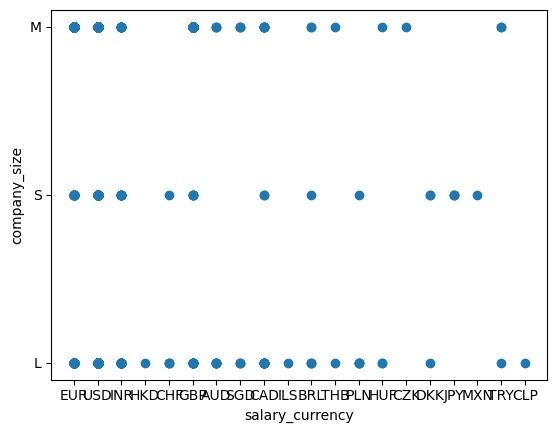

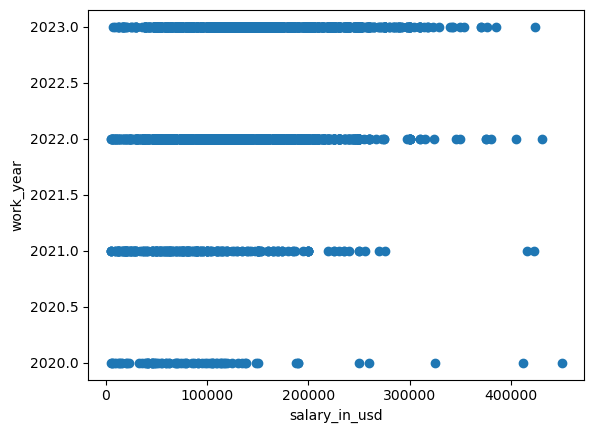

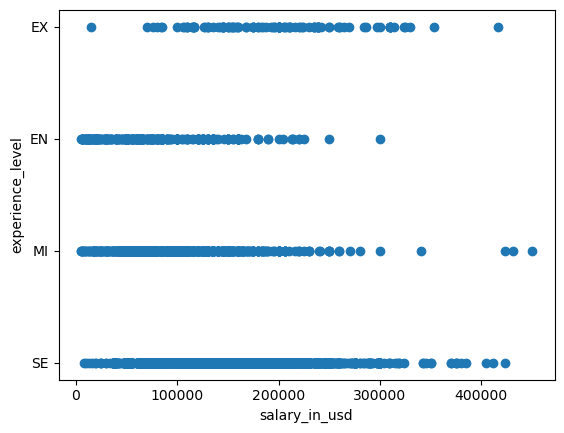

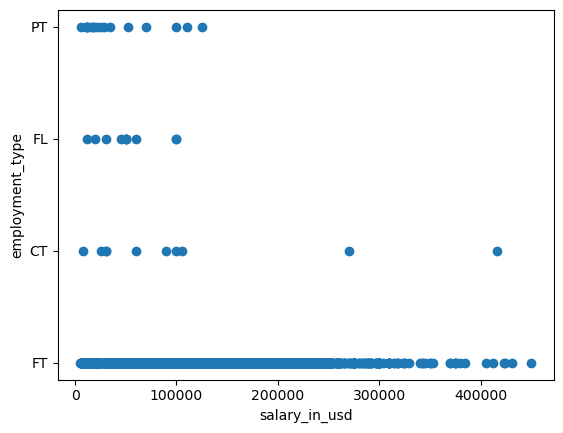

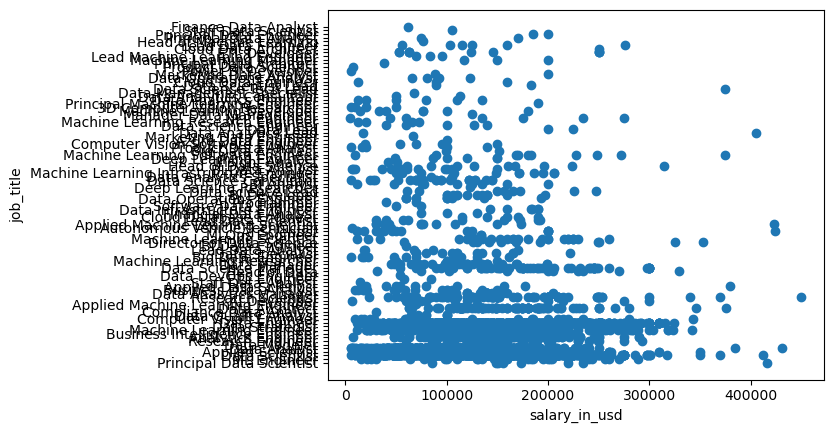

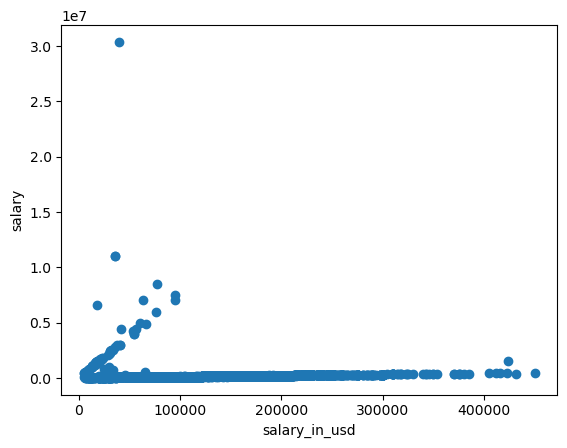

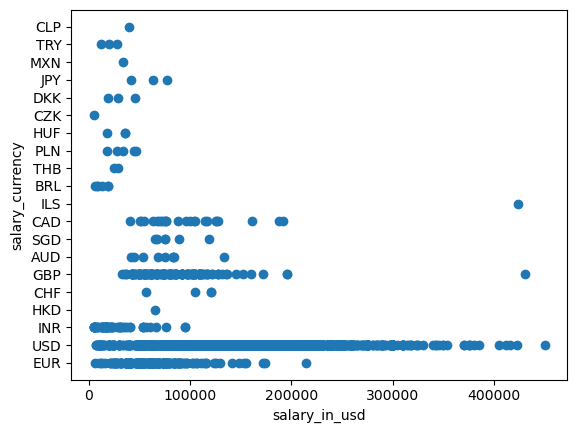

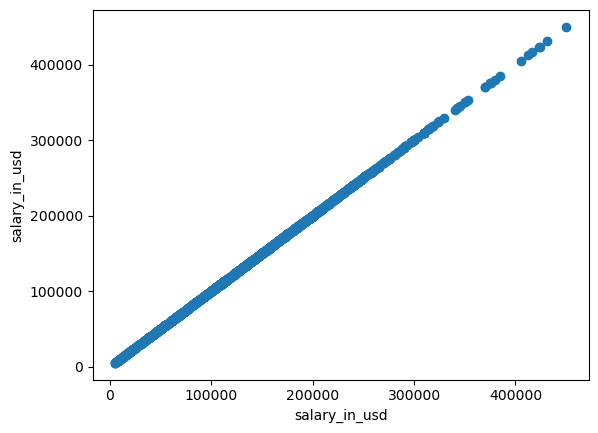

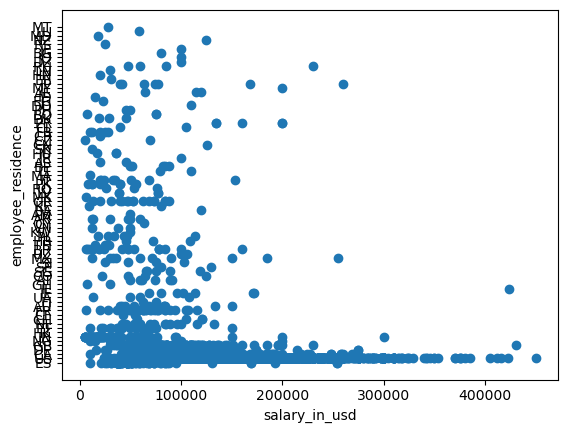

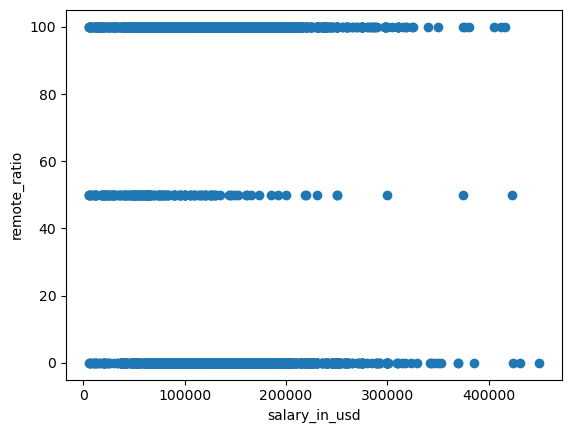

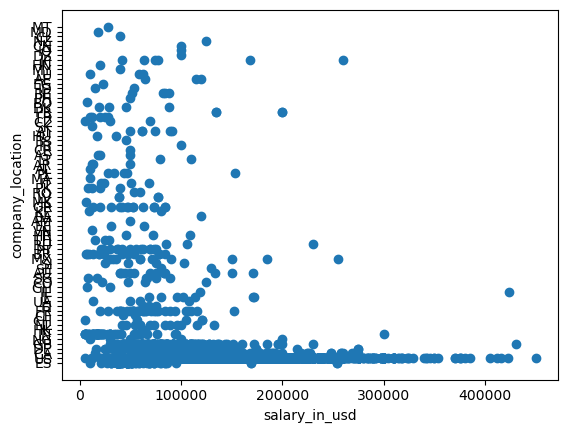

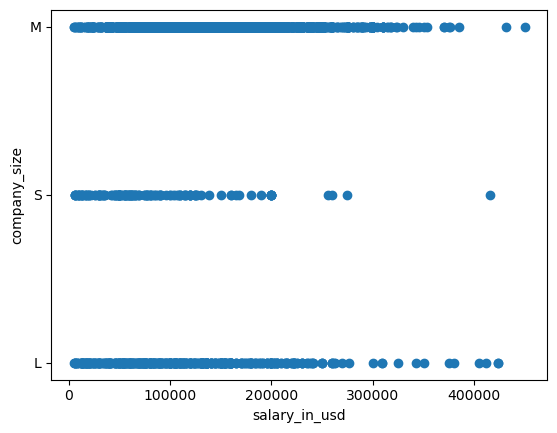

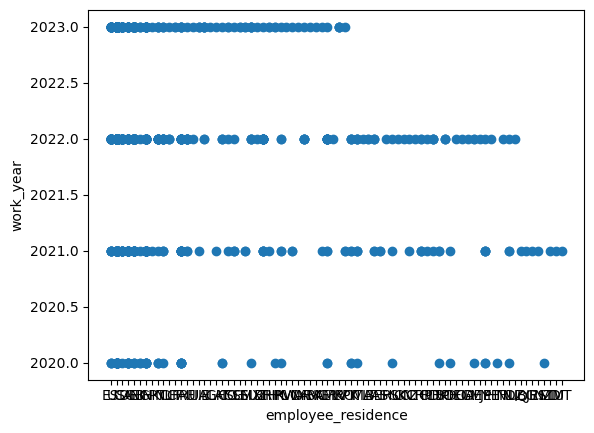

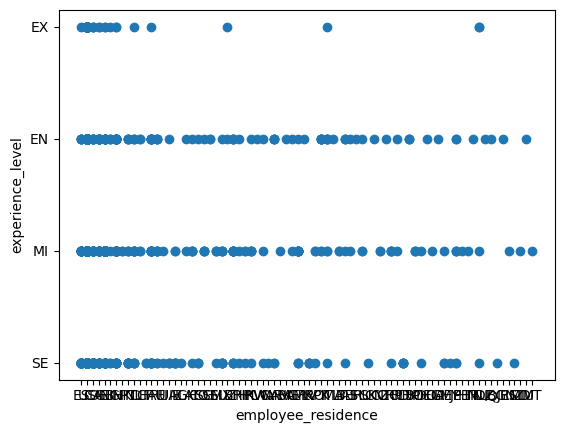

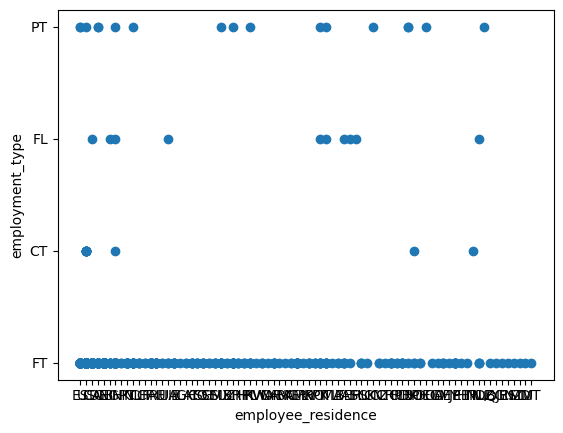

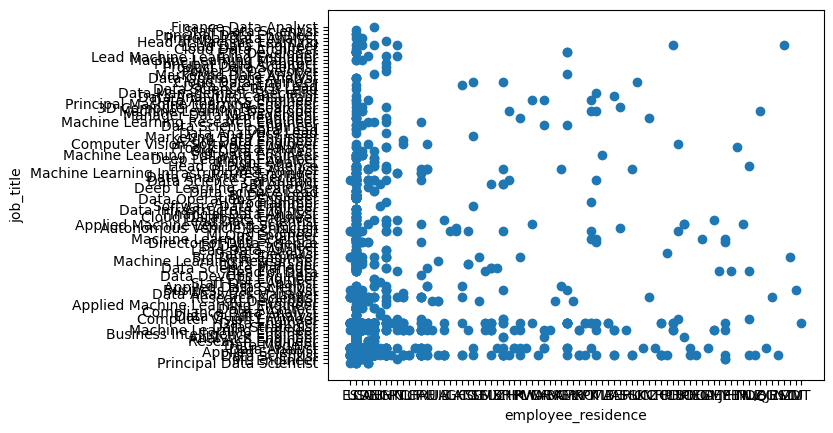

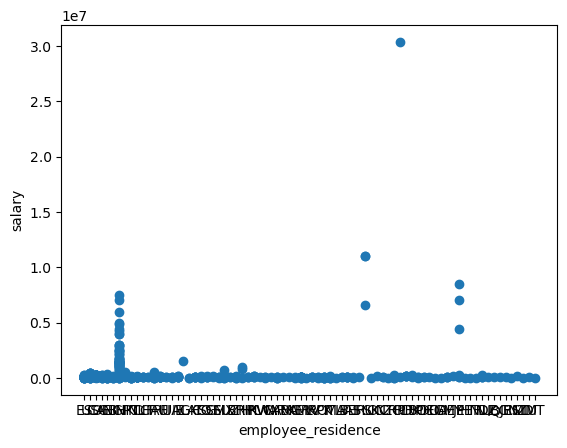

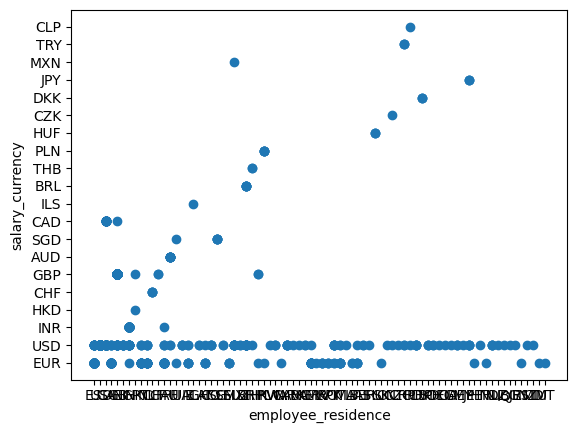

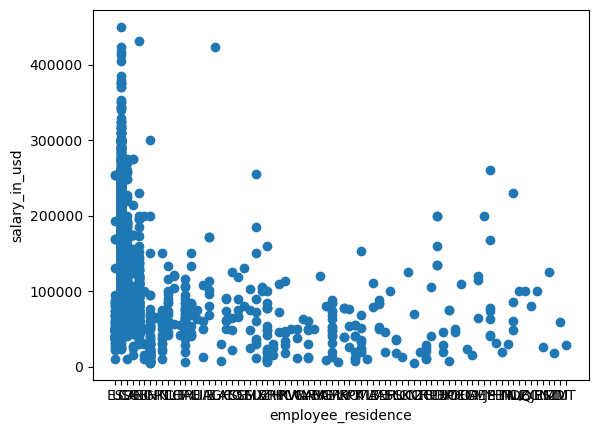

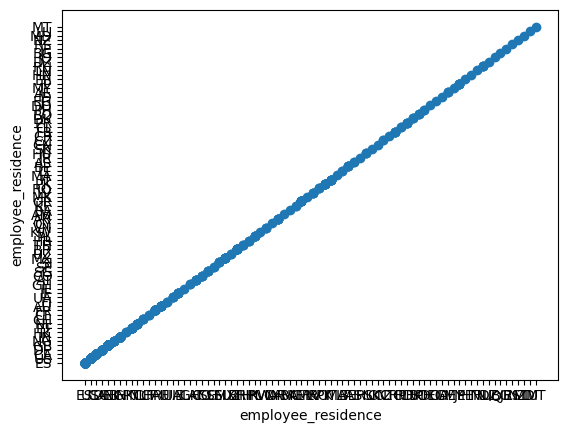

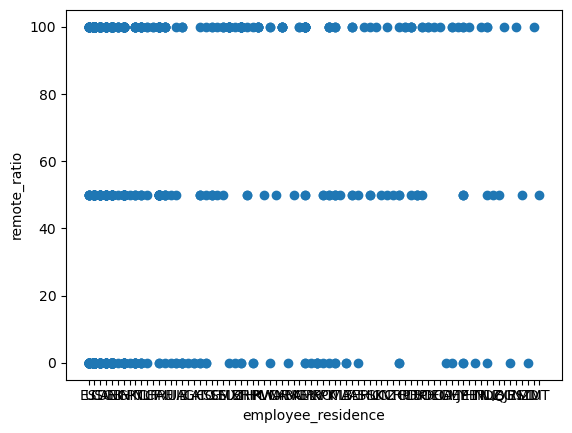

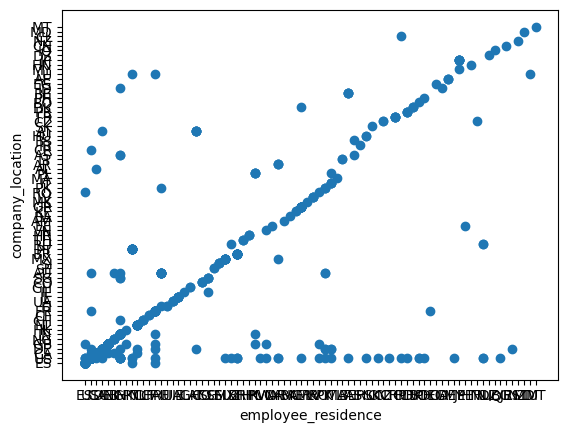

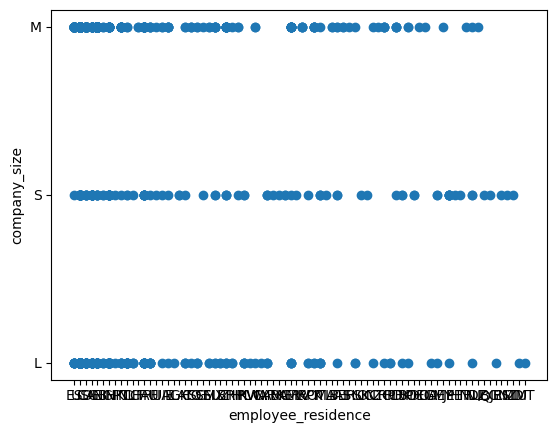

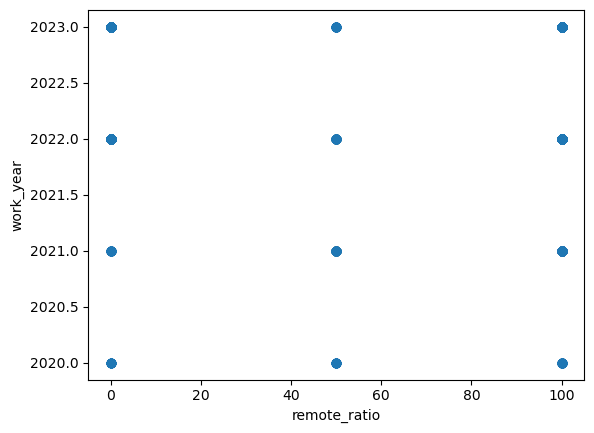

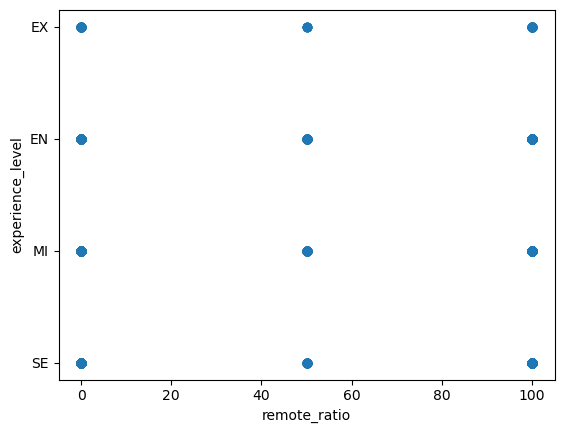

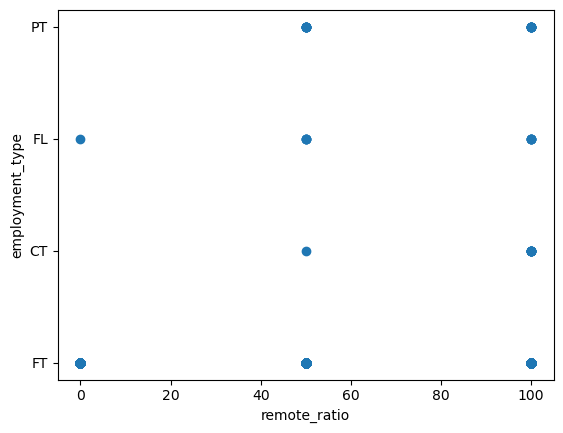

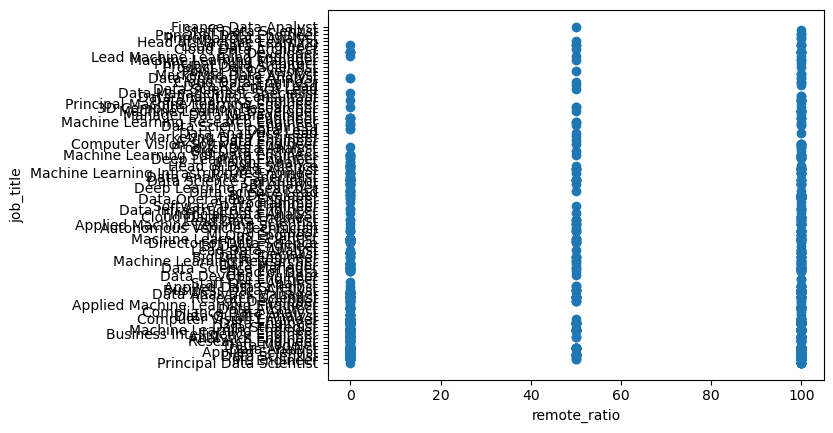

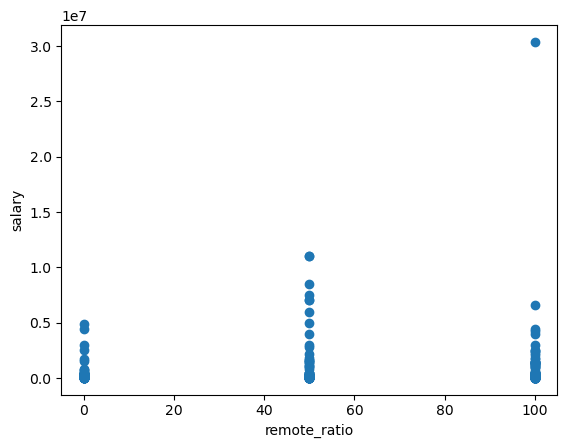

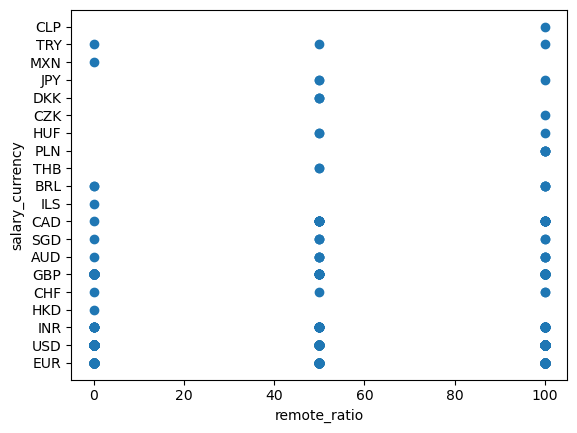

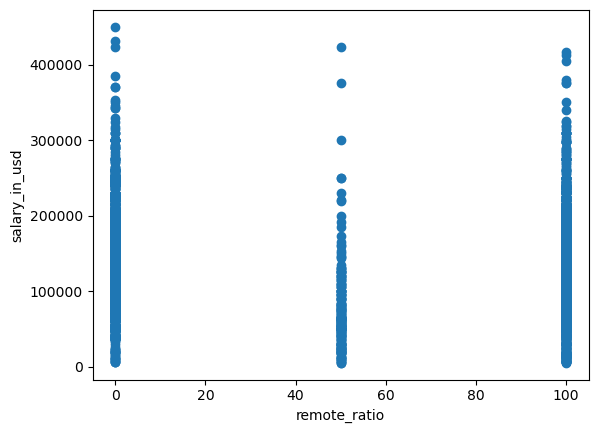

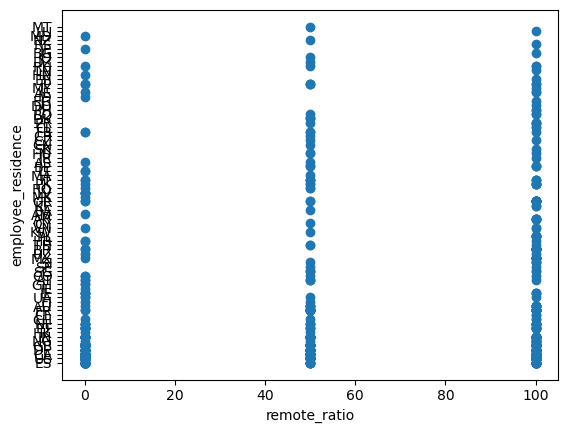

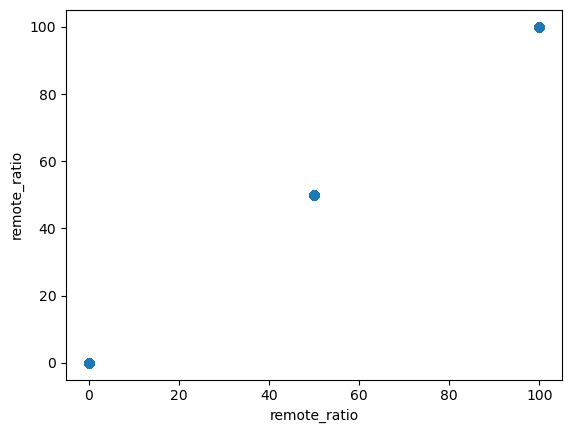

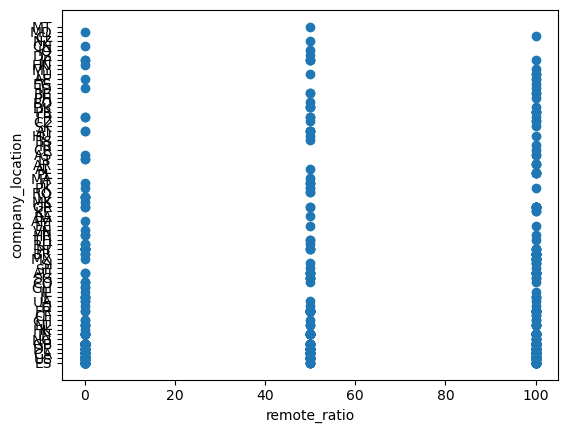

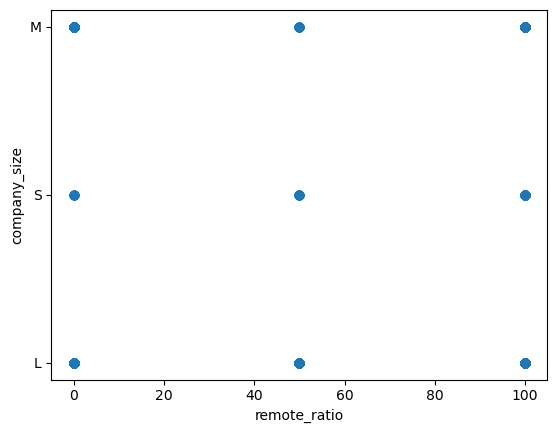

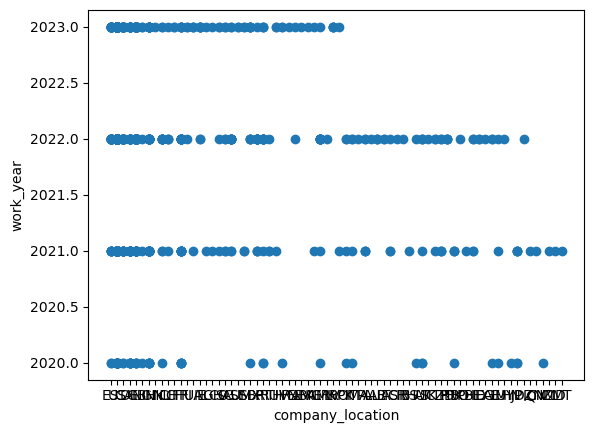

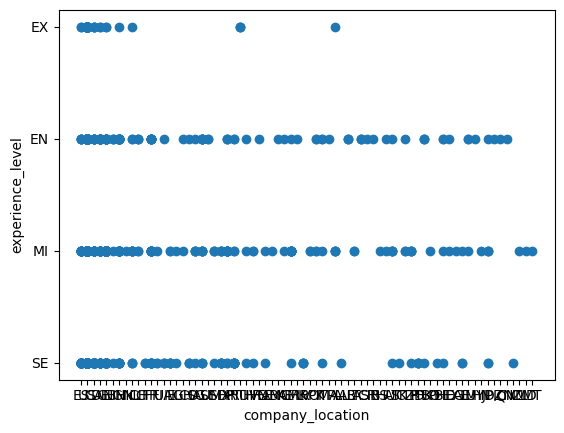

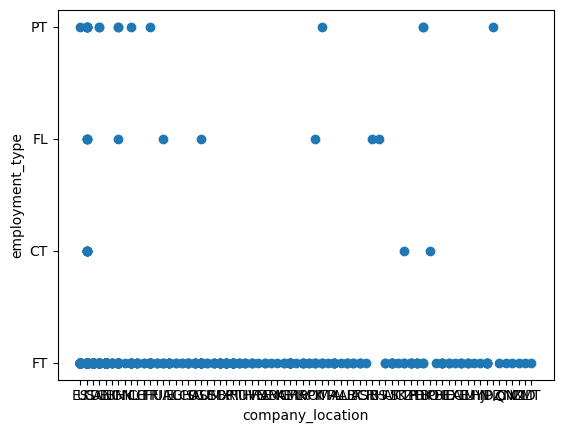

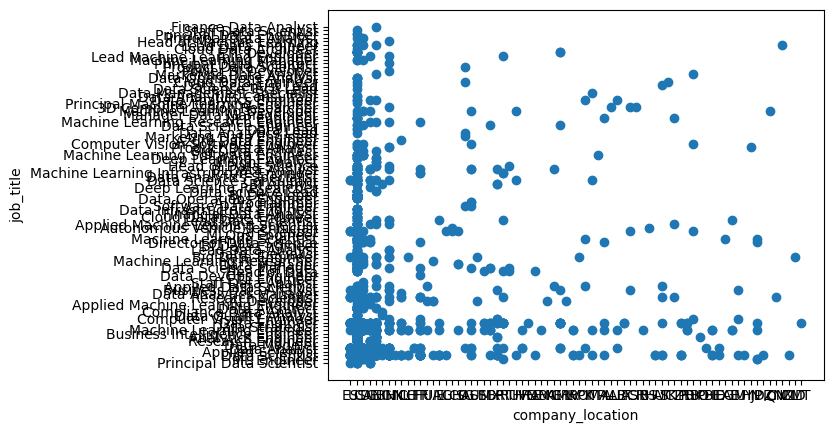

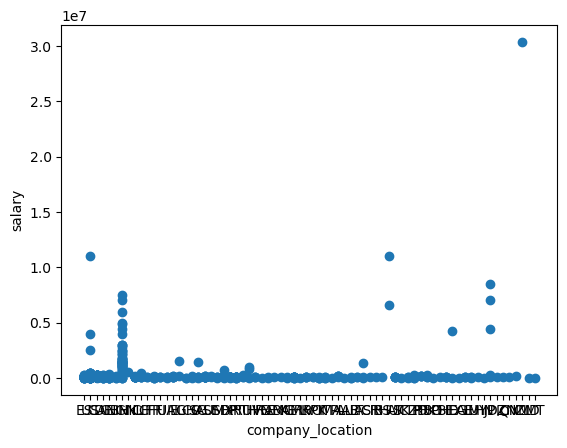

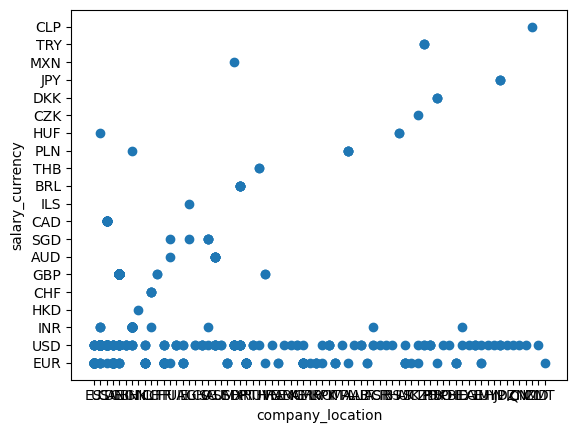

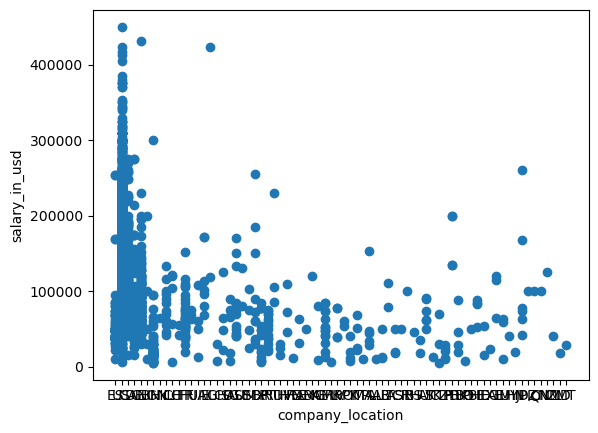

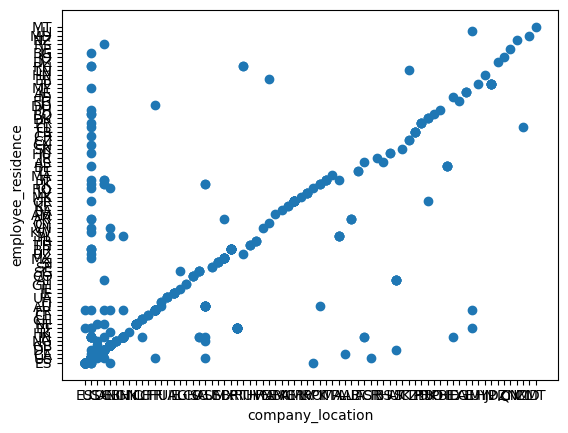

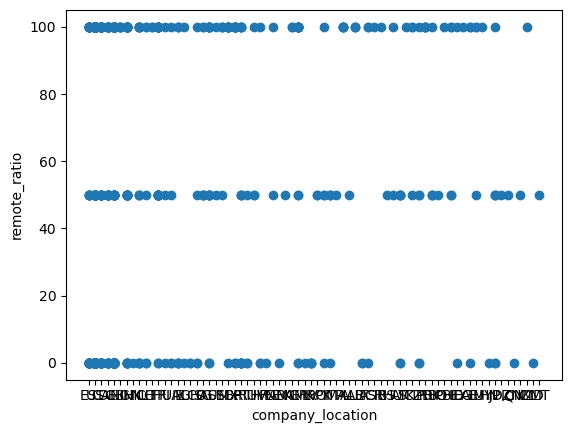

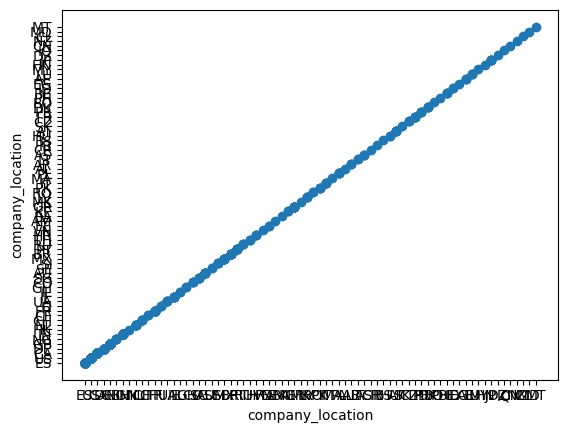

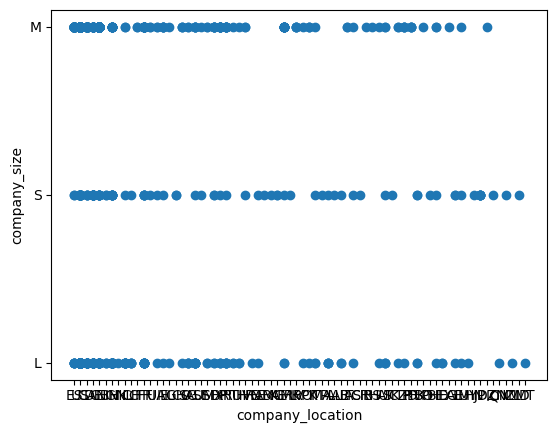

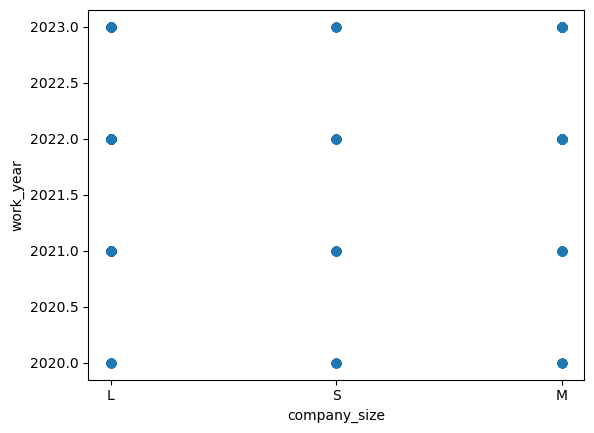

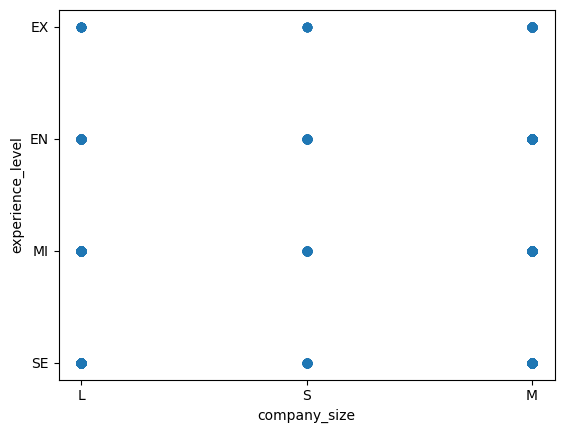

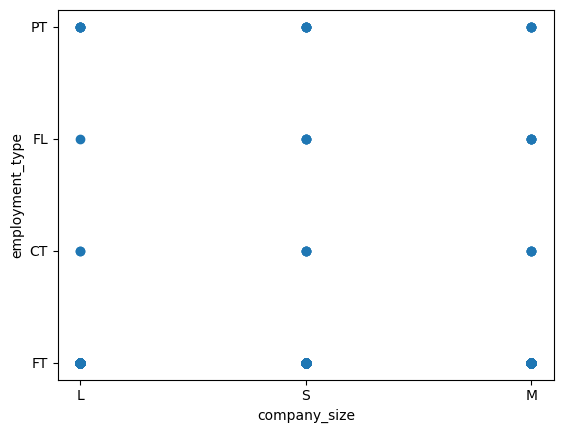

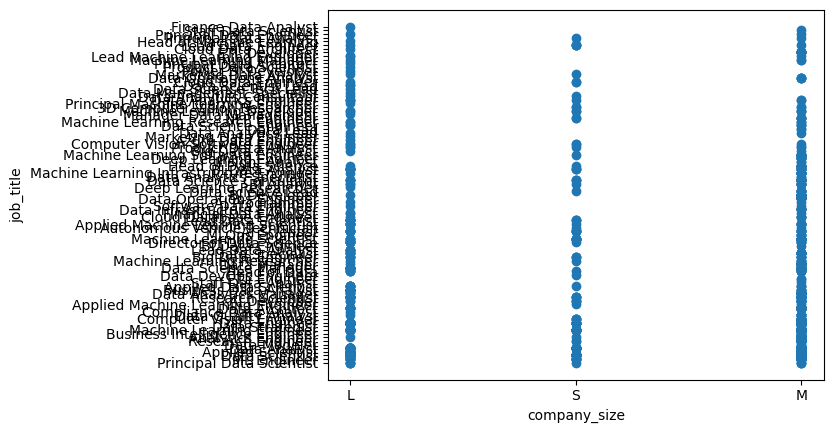

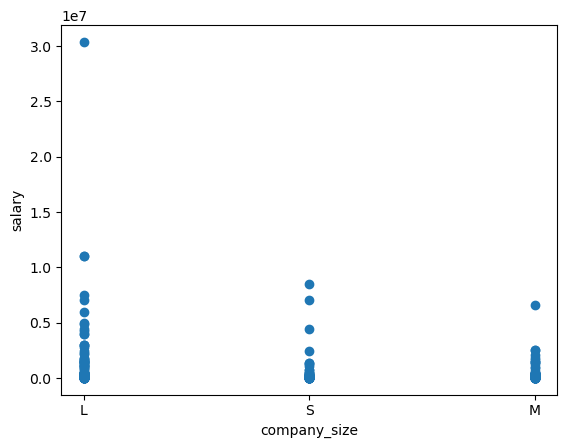

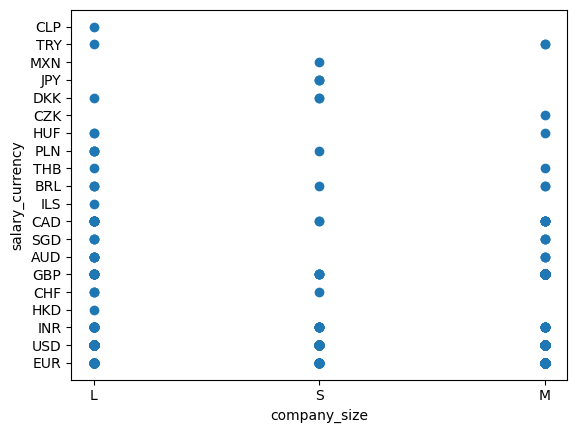

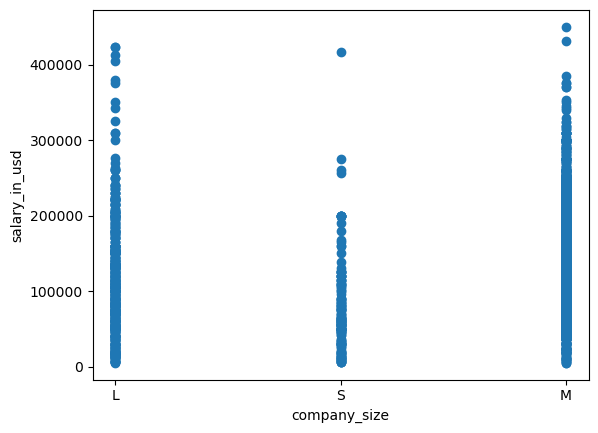

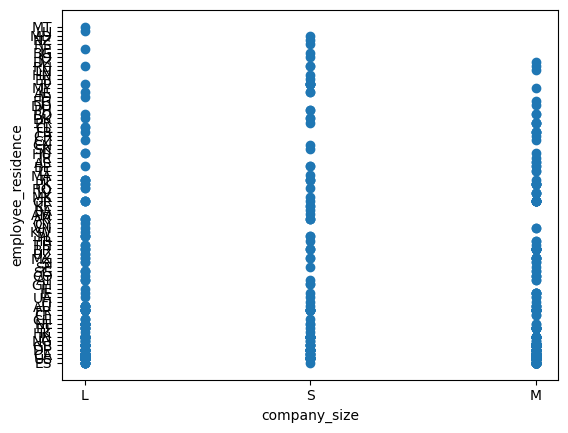

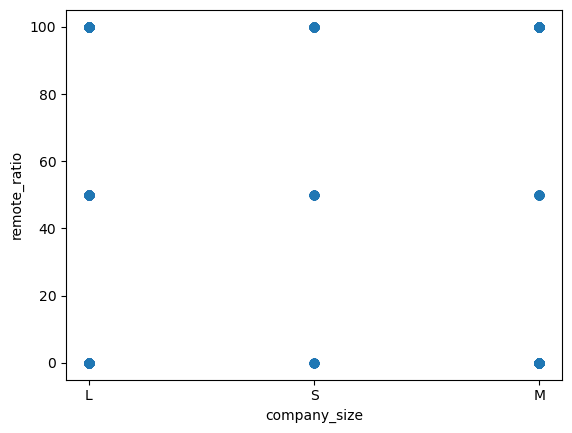

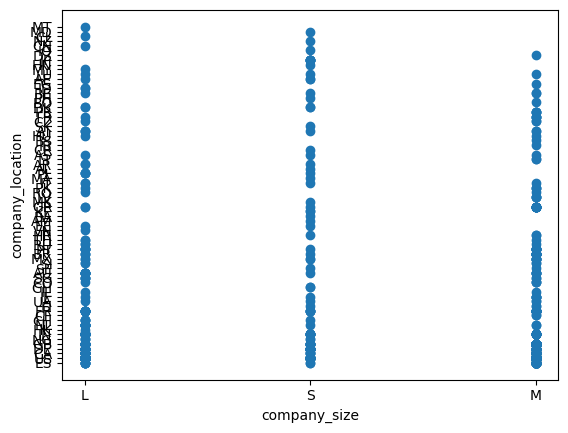

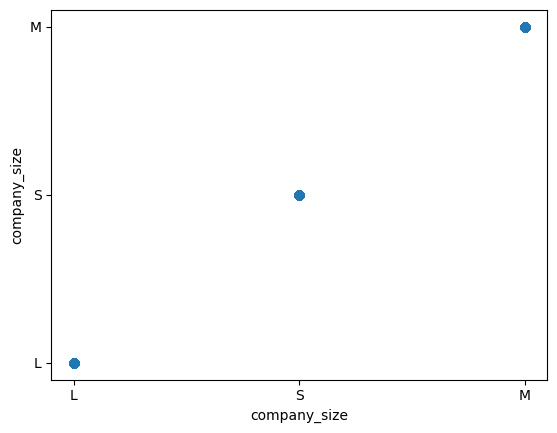

In [11]:
for col1 in df.columns:
    for col2 in df.columns:
        plt.scatter(df[col1], df[col2])
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

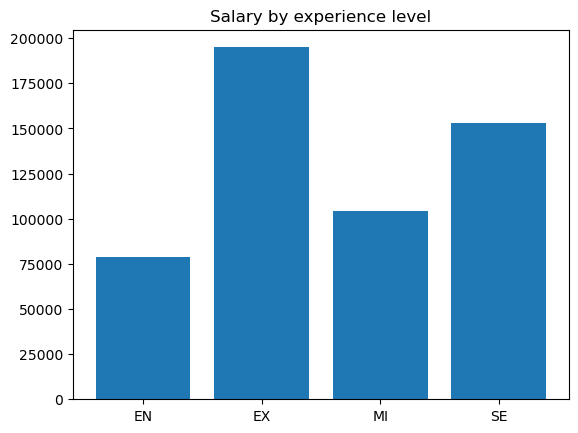

In [12]:
mean_df = df.groupby('experience_level').mean().reset_index()
mean_df.head()
plt.bar(mean_df['experience_level'],mean_df['salary_in_usd']) 
plt.title("Salary by experience level")
plt.show()

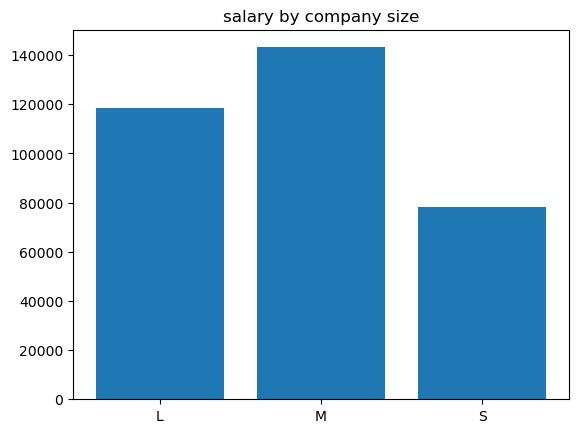

In [13]:
mean_df = df.groupby('company_size').mean().reset_index()
mean_df.head()
plt.bar(mean_df['company_size'],mean_df['salary_in_usd']) 
plt.title('salary by company size')
plt.show()

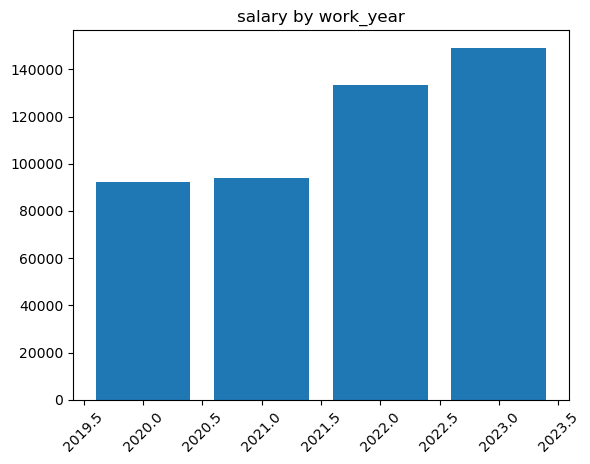

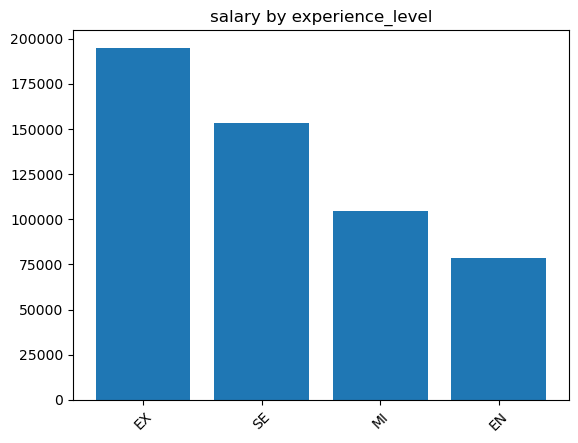

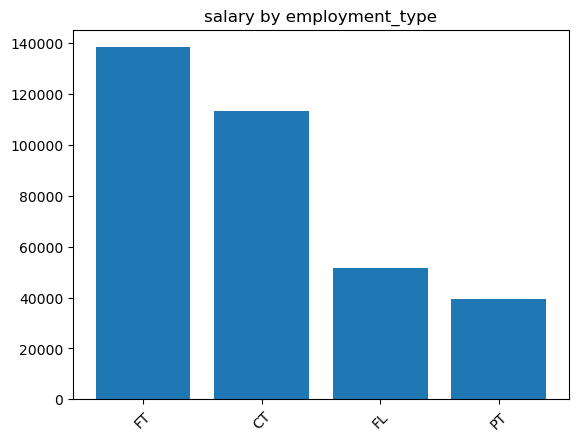

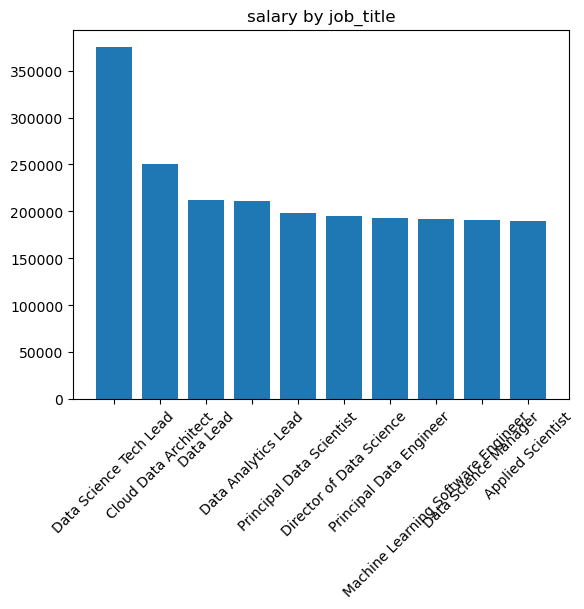

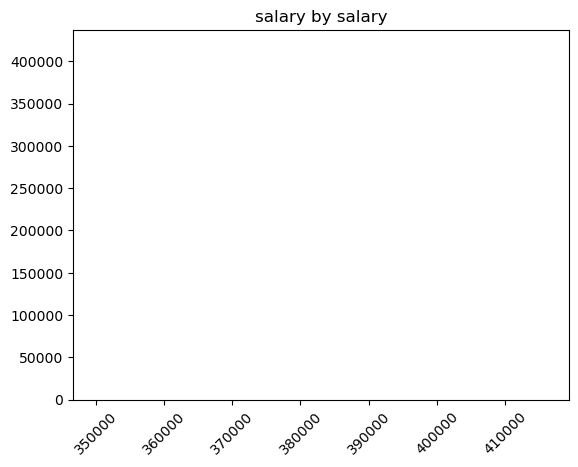

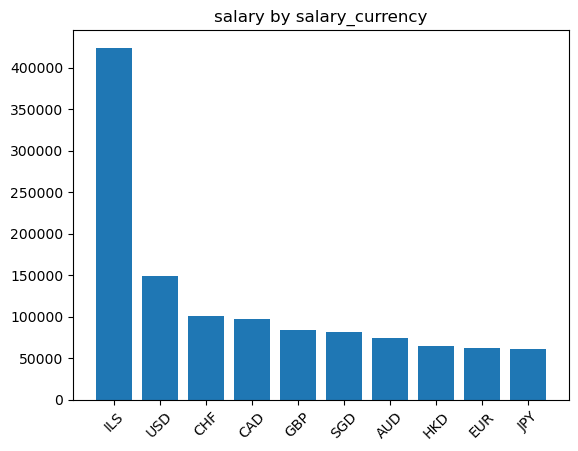

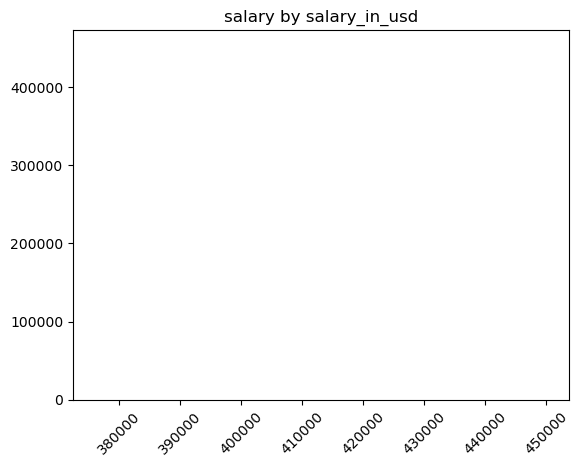

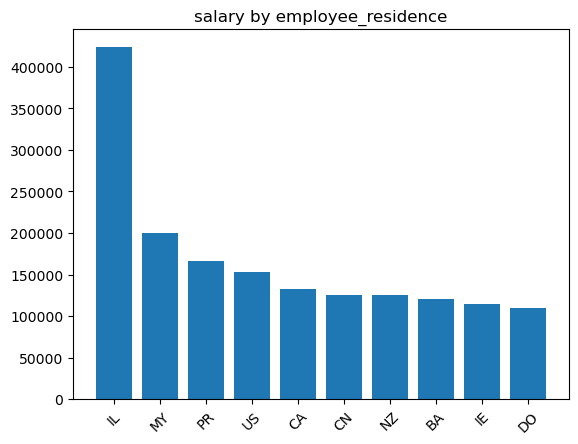

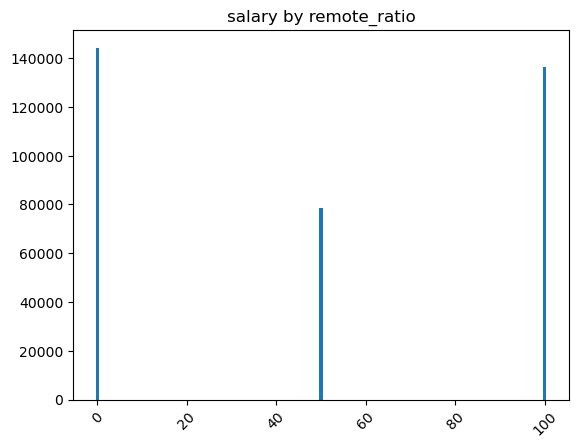

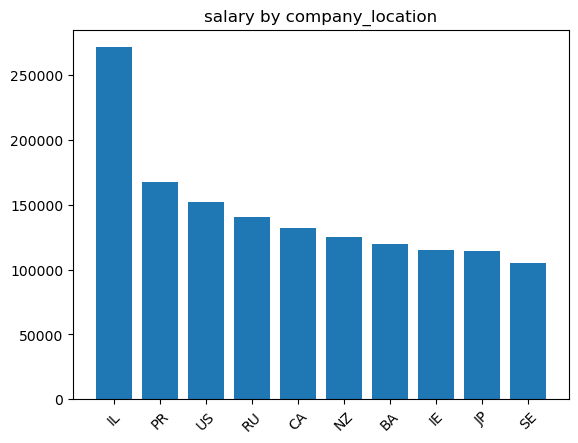

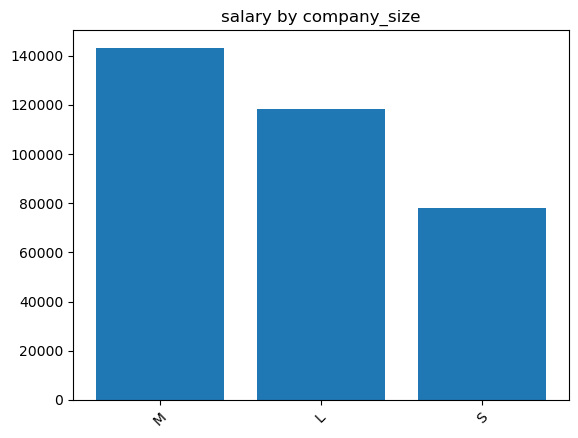

In [30]:
for col in df.columns:
    mean_df = df.groupby(col).mean().reset_index()
    mean_df = mean_df.sort_values('salary_in_usd',ascending = False).head(10)
    plt.bar(mean_df[col],mean_df['salary_in_usd'])
    plt.title(f'salary by {col}')
    plt.xticks(rotation=45)

    plt.show()

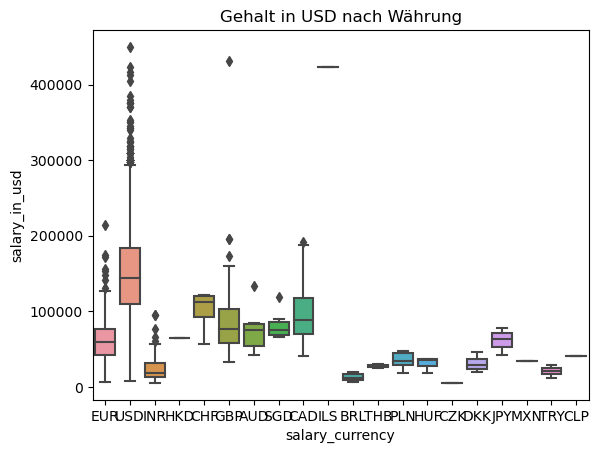

In [31]:
import seaborn as sns

# Erstelle ein Boxplot der Gehälter nach Währung
sns.boxplot(x='salary_currency', y='salary_in_usd', data=df)

# Gib dem Plot einen Titel
plt.title('Gehalt in USD nach Währung')

# Zeige den Plot an
plt.show()

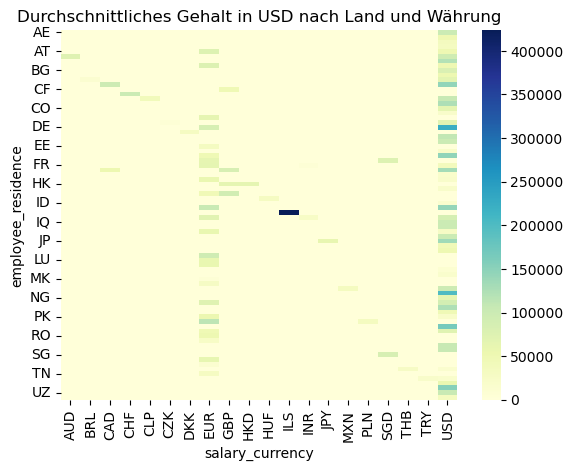

In [34]:
import numpy as np
import seaborn as sns

# Berechne den durchschnittlichen Gehalt für jede Kombination von Land und Währung
avg_salary = df.groupby(['employee_residence', 'salary_currency'])['salary_in_usd'].mean()
avg_salary = avg_salary.reset_index()

# Konvertiere die durchschnittlichen Gehälter in eine Pivot-Tabelle
pivot_salary = pd.pivot_table(avg_salary, values='salary_in_usd', index='employee_residence', columns='salary_currency')

# Ersetze NaN-Werte durch 0
pivot_salary = pivot_salary.fillna(0)

# Erstelle eine Heatmap der durchschnittlichen Gehälter für jede Kombination von Land und Währung
sns.heatmap(pivot_salary, cmap='YlGnBu')

# Gib dem Plot einen Titel
plt.title('Durchschnittliches Gehalt in USD nach Land und Währung')

# Zeige den Plot an
plt.show()


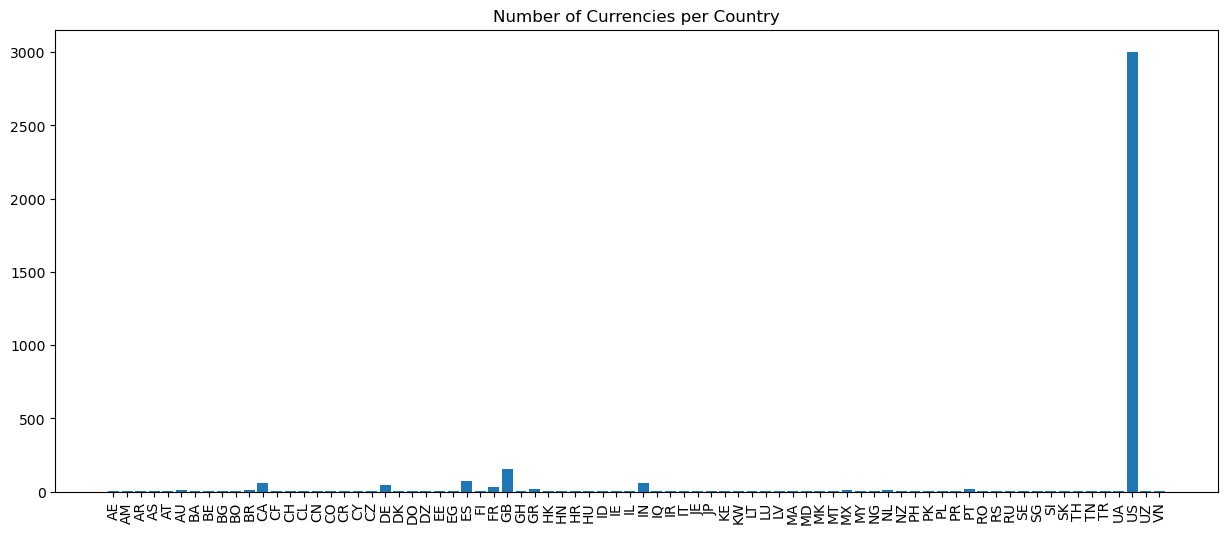

In [44]:
currency_count = df.groupby(['employee_residence', 'salary_currency']).size().reset_index(name='count')
currency_count.head()
plt.figure(figsize=(15,6))
plt.bar(currency_count['employee_residence'], currency_count['count'])
plt.xticks(rotation=90)
plt.title('Number of Currencies per Country')
plt.show()

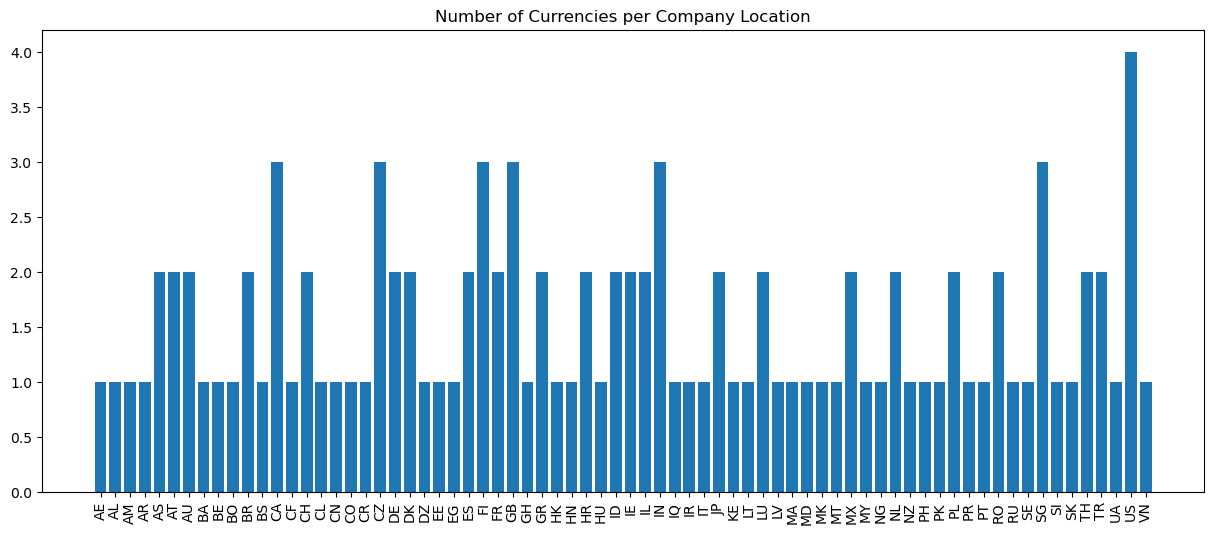

In [53]:
currency_count = df.groupby(['company_location', 'salary_currency']).size().reset_index(name='count')
currency_count.head(100)
currency_count_group = currency_count.groupby(['company_location']).size().reset_index(name='count')
currency_count_group.head(100)
plt.figure(figsize=(15,6))
plt.bar(currency_count_group['company_location'], currency_count_group['count'])
plt.xticks(rotation=90)
plt.title('Number of Currencies per Company Location')
plt.show()

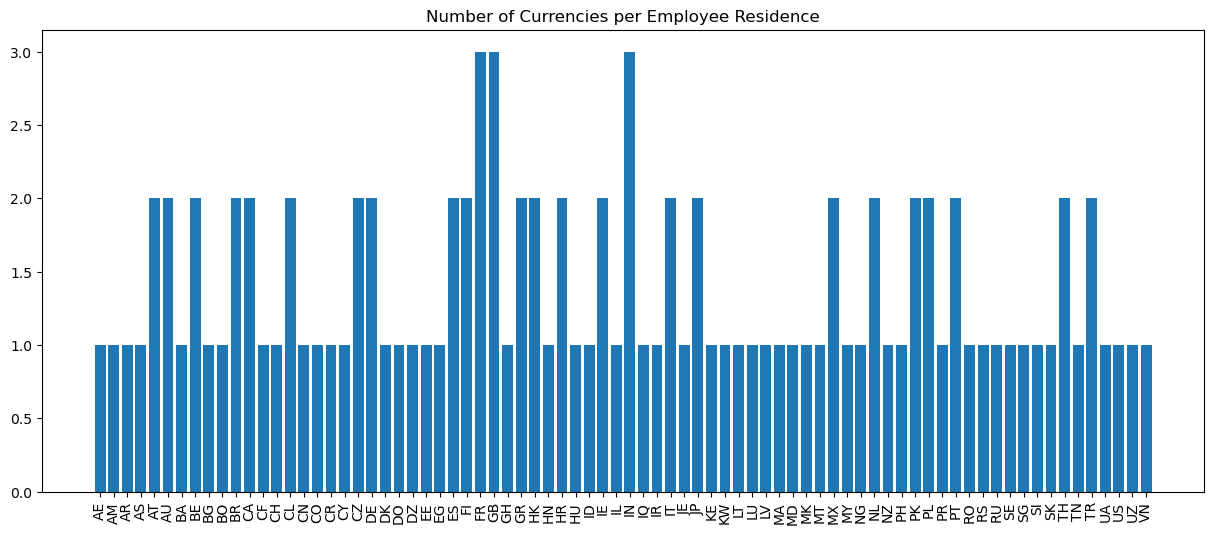

In [55]:
currency_count = df.groupby(['employee_residence', 'salary_currency']).size().reset_index(name='count')
currency_count.head(100)
currency_count_group = currency_count.groupby(['employee_residence']).size().reset_index(name='count')
currency_count_group.head(100)
plt.figure(figsize=(15,6))
plt.bar(currency_count_group['employee_residence'], currency_count_group['count'])
plt.xticks(rotation=90)
plt.title('Number of Currencies per Employee Residence')
plt.show()